<a href="https://colab.research.google.com/github/phuongnam2002/AI-Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning cơ bản
1. Phân nhóm các loại thuật toán
1. Linear Regression
1. K-means Clustering
1. K-means neighbors
1. Gradient Descent
1. Perceptron Learning Algorithm
1. Logistic Regression
1. Feature Engineering
1. Binary Classifiers
1. Softmax Regression
1. Multi-layer Perceptron và Backpropagation

##1. Phân nhóm các loại thụât toán

###**1. Phân nhóm dựa trên phương thức học**

**1.1. Supervised Learning (Học có giám sát)**

  Là thuật toán dự đoán đầu ra (outcome) của một dữ liệu mới (new input) dựa trên các cặp (input, outcome) đã biết từ trước. Cặp dữ liệu này còn được gọi là (data, label), tức (dữ liệu, nhãn). Supervised learning là nhóm phổ biến nhất trong các thụât toán Machine learning.

- **Classification (Phân loại)**:
  Một bài toán được gọi là classification nếu các label của input data được chia thành một số hữu hạn nhóm.

- **Regression (Hồi quy)**:
  Nếu label không được chia thành các nhóm mà là một giá trị thực cụ thể.

Trong ứng dụng dự đoán tuối giới tính dựa trên khuôn mặt. Phần dự đoán giới tnhs có thể coi là thuật toán **Classification**, phần dự đoán tuổi có thể coi là thuật toán **Regression**. *Chú ý rằng phần dự đoán tuổi cũng có thể coi là Classification nếu ta coi tuổi là một số nguyên dương không lớn hơn 150, chúng ta sẽ có 150 class (lớp) khác nhau.*

**1.2. Unsupervised Learning (Học không giám sát)**

  Unsupervised learning là khi chúng ta chỉ có dữ liệu vào **X** mà không biết nhãn **Y** tương ứng.

- **Clustering (phân nhóm):**
  Một bài toán phân nhóm toàn bộ dữ liệu **X** thành các nhóm nhỏ dựa trên sự liên quan giữa các dữ liệu trong mỗi nhóm.

- **Association:**
  Là bài toán khi chúng ta muốn khám phá ra một quy luật dựa trên nhiều dữ liệu cho trước.

**1.3. Semi-Supervised Learning (Học bán giám sát)**

  Các bài toán khi chúng ta có một lượng lớn dữ liệu **X** nhưng chỉ một phần trong chúng được gán nhãn được gọi là Semi-Supervised Learning.

**1.4. Reinforcement Learning (Học Củng cố)**

  Reinforcement learning là các bài toán giúp cho một hệ thống tự động xác định hành vi dựa trên hoàn cảnh để đạt được lợi ích cao nhất (maximizing the performance). Hiện tại, Reinforcement learning chủ yếu được áp dụng vào Lý Thuyết Trò Chơi (Game Theory), các thuật toán cần xác định nước đi tiếp theo để đạt được điểm số cao nhất.

###**2. Phân nhóm dự trên chức năng**
- Regression Algorithms
- Classification Algorithms
- Regularization Algorithms
- Bayesian Algorithms
- Clustering Algorithms
- Artificial Neural Network Algorithms
- Dimensionality Reduction Algorithms
- Ensemble Algorithms


##2. Liner Regression

Bài toán có đầu vào $x= [x_{1},x_{2},x_{3}]$ cần tìm $y^{hat}$ *(giá trị dự đoán)* có giá trị gần bằng $y$ *(giá trị thực tế)*.

1. Dạng của Linear Regression

  $w = [w_{0},w_{1},w_{2},w_{3}]$ *weight*

  $x^{bar} = [1,x_{1},x_{2},x_{3}]$ 
  Số 1 ở đầu là hệ số của $w_{0}$ *(bias)*

  $y^{hat} = x^{bar}w$

2. Sai số  dự đoán

  Chúng ta mong muốn rằng sự sai khác $e$ giữa giá trị thực $y$ và giá trị dự đoán $y^{hat}$ là nhỏ nhất.

  $\frac{1}{2}e^{2} = \frac{1}{2}(y-y^{hat})^{2} = \frac{1}{2} (y - x^{bar}w)^{2}$

3. Hàm mất mát

  $L(w) = \frac{1}{2} \sum_{i=1}^{N}(y_{i} - x^{bar}_{i}w)^{2}$

  Giá trị của *w* làm cho hàm mất mát đạt giá trị nhỏ nhất được gọi là điểm tối ưu (optimal point), ký hiệu:

  $w^{*}= argmin_{w} L(w)$

  - $y= [y_{1};y_{2};...;y_{N}]$ output của training data;
  - $X^{bar} = [x_{1};x_{2};...;x_{N}]$ ma trận dữ liệu đầu vào (mở rộng).

  $L(w) = \frac{1}{2} \sum_{i=1}^{N}(y_{i} - x^{bar}_{i}w)^{2} = \frac{1}{2}\parallel y-X^{hat}w \parallel^{2}_{2}$

4. Nghiệm của bài toán

  Đạo hàm theo w của hàm mất mát là:

  $\frac{∂L(w)}{∂w}= (X^{bar})^{T}(X^{bar}w-y)$

  Phương trình đạo hàm bằng 0 tương đương:

  $(X^{bar})^{T}X^{bar}w = (X^{bar})^{T}y$ đặt bằng $b$

  Nếu ma trận vuông $A$ đặt bằng $X^{bar})^{T}X^{bar}$ khả nghịch thì phương trình có nghiệm duy nhất: $w = A^{-1}b$.

  Với khái niệm giả nghịch đảo, điể m tối ưu của bài toán Linear Regrssion có dạng:

  $ w = A^{†}b = ((X^{bar})^{T}X^{bar})^{†}X^{bar}y$





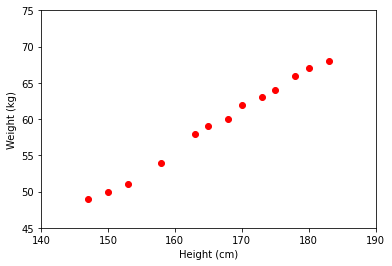

In [ ]:
# Bài toán nhập chiều cao dự đoán cân nặng
import numpy as np 
import matplotlib.pyplot as plt

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [[-33.73541021]
 [  0.55920496]]


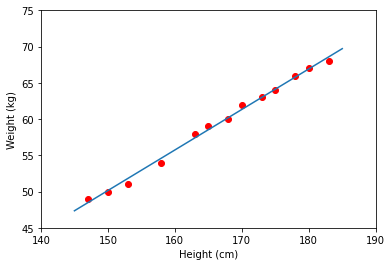

In [ ]:
# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

5. Các bài toán có thể  giải bằng Linear Regrssion

  Trên thực tế, Linear Regrssion có thể áp dụng cho các mô hình chỉ cần tuyến tính theo w. ví dụ về Quadratic Regression.

![Quadratic Regression](http://www.varsitytutors.com/assets/vt-hotmath-legacy/hotmath_help/topics/quadratic-regression/f-qr-1-1.gif)

6. Hạn chế của Linear Regression

- Nhạy cảm với nhiễu (sensitive to noise)

![Image nhay cam](https://machinelearningcoban.com/assets/LR/output_13_1.png)

- Không biểu diễn được các mô hình phức tạp. Trong hầu hết các trường hợp, *chúng ta không thể  giải được phương trình đạo hàm bằng 0.*



##3. K-means Clustering

Trên một vùng biển hình vuông lớn có ba đảo hình vuông, tam giác, và tròn màu vàng như hình trên. Một điểm trên biển được gọi là thuộc lãnh hải của một đảo nếu nó nằm gần đảo này hơn so với hai đảo kia . Hãy xác định ranh giới lãnh hải của các đảo.

![3 clusters](https://machinelearningcoban.com/assets/kmeans/figure_2.png)

![phan vung](https://machinelearningcoban.com/assets/kmeans/figure_1.png)

Chúng ta thấy rằng đường phân định giữa các lãnh hải là đường thẳng (chính xác hơn thì chúng là các đường trung trực của các cặp điểm gần nhau). Vì vậy, lãnh hải của một đảo sẽ là các hình đa giác.

Cách phân chia này trong toán học được gọi là **Voronoi Diagram**.


**1. Phân tích toán học**

Giả sử có $N$ điểm dữ liệu là $X = [x_{1},x_{2},...,x_{N}]$ thuộc $R^{d\text{x}N}$ và $K < N$ là số cluster chúng ta muốn phân chia. Chúng ta cần tìm các center $m_{1}, m_{2},...,m_{K}$ thuộc $R^{d \text{x} 1}$ và label của mỗi điểm dữ liệu.

- Điểm dữ liệu $x_{i}$ có lable $y_{i}$

Trong đó $y_{i} = [y_{i1},y_{i1},...,y_{iK}$. Nếu $x_{i}$ được phân vào cluster $k$ thì $y_{ik} = 1$ và $y_{ij} = 0$ với mọi $j!=k$.

Đây là cách biểu diễn **one-hot**.

Ràng buộc của $y_{i}$ có thể viết dưới dạng toán học như sau:
$y_{ik} \in \{0,1\}, \sum_{k=1}^{K} y_{ik} = 1$


**Hàm mất mát và bài toán tối ưu**

- Coi center $m_{k}$ là center của mỗi cluster. Nếu $x_{i}$ được phân vào cluster $k$ sẽ có sai số là: 
$\parallel x_{i} - m_{k} \parallel_{2}^{2}$

- Do tính chất của one-hot của $y_{i}$ nên:
$y_{ik}\parallel x_{i} - m_{k} \parallel_{2}^{2} = \sum_{j=1}^{K} y_{ij} \parallel x_{i} - m_{j} \parallel_{2}^{2}$

- Sai số cho toàn bộ dữ liệu sẽ là: 
$L(Y,M) = \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij}\parallel x_{i} - m_{j} \parallel_{2}^{2}$

Với $Y=[y_{1};y_{2};...;y_{N}], M = [m_{1}, m_{2},...,m_{k}]$ chúng ta cần tối ưu bài toán:
$Y,M = argmin_{Y,M} \sum_{i=1}^{N} \sum_{j=1}^{K} y_{ij}\parallel x_{i} - m_{j} \parallel_{2}^{2}$

**Thuật toán tối ưu hàm mất mát**

Cố định $M$, tìm $Y$

- Giả sử đã tìm được các centers, hãy tìm các label vector để hàm mất mát đạt giá trị nhỏ nhất $=>$ Đây là bước tìm cluster cho mỗi điểm dữ liệu.

- Bài toán tìm label vector cho từng điểm dữ liệu $x_{i}$:  
$y_{i} = argmin_{y_{i}} \sum_{j=1}^{K} y_{ij}\parallel x_{i} - m_{j} \parallel_{2}^{2}$

- Vì chỉ có một phần tử của label $y_{i}$ bằng 1 nên:
$j = argmin_{j}\parallel x_{i} - m_{j} \parallel_{2}^{2}$

- Vì $\parallel x_{i} - m_{j} \parallel_{2}^{2}$ chính là bình phương khoảng cách tính từ điểm $x_{i}$ tới center $m_{j}$, ta có thể kết luận rằng **mỗi điểm $x_{i}$ thuộc vào cluster gần nó nhất.**


Cố định $Y$, tìm $M$

- Giả sử đã tìm được cluster cho từng điểm, hãy tìm center mới cho mỗi cluster để hàm mất mát đạt giá trị nhỏ nhất.

- Bài toán đi tìm center cho mỗi cluster:
$m_{j} = argmin_{m_{j}} \sum_{i=1}^{N} y_{ij}\parallel x_{i} - m_{j} \parallel_{2}^{2}$

- Đặt $l(m_{j})$ là hàm bên trong dấu argmin, ta có đạo hàm:
$\frac{∂l(m_{j})}{∂m_{j}} = 2 \sum_{i=1}^{N} y_{ij}(m_{j} - x_{i})$

- Giải phương trình đạo hàm bằng 0 ta có:
$m_{j} \sum_{i=1}^{N} y_{ij} = \sum_{i=1}^{N} y_{ij}x_{i} => m_{j} = \frac{\sum_{i=1}^{N} y_{ij}x_{i}}{\sum_{i=1}^{N} y_{ij}}$

- Hay nói một cách đơn giản hơn nhiều: $m_{j}$ là trung bình cộng của các điểm trong cluster $j$. Tên gọi K-means clustering cũng xuất phát từ đây.

**Tóm tắt thuật toán**
- Đầu vào: Dữ liệu $x$ và số lượng các cluster cần tìm $K$.

- Đầu ra: Các center $M$ và label vector cho từng điểm dữ liệu $Y$.

1. Chọn $K$ điểm bất kỳ làm các center ban đầu.
1. Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất.
1. Nếu việc gán dữ liệu vào từng cluster ở bước 2 không có thay đổi so với vòng lặp trước no thì ta dừng thuật toán.
1. Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất cả các điểm dữ liệu đã được gán vào cluster đó sau bước 2.
1. Quay lại bước 2.

Chúng ta có thể đảm bảo rằng thuật toán sẽ dừng lại sau một số hữu hạn vòng lặp. Thật vậy, vì hàm mất mát là một số dương và sau mỗi bước 2 hoặc 3, giá trị của hàm mất mát bị giảm đi. Theo kiến thức về dãy số trong chương trình cấp 3: *nếu một dãy số giảm và bị chặn dưới thì nó hội tụ!*

**2. Ví dụ trên Python**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [ ]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

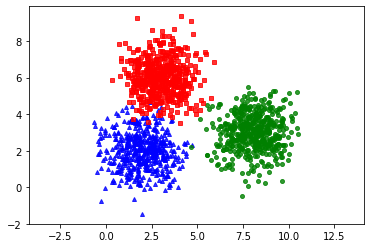

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [ ]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


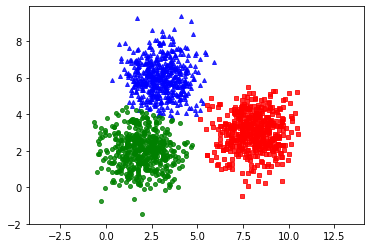

In [ ]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

Minh họa thụât toán
![Minh hoa](https://machinelearningcoban.com/assets/kmeans/kmeans11.gif)


**3. Hạn chế**
- Chúng ta cần biết số lượng cluster cần clustering.
- Nghiệm cuối cùng phụ thuộc vào các centers được khởi tạo ban đầu.

  Tùy vào các center ban đầu mà thuật toán có thể có tốc độ hội tụ rất chậm, ví dụ:
  ![Minhhoa](https://machinelearningcoban.com/assets/kmeans/kmeans_slowconverge.gif)
  hoặc thậm chí cho chúng ta nghiệm không chính xác (chỉ là local minimum - điểm cực tiểu - mà không phải giá trị nhỏ nhất):
 ![Minhhoa](https://machinelearningcoban.com/assets/kmeans/kmeans_badresult.gif)

- Các cluster cần có só lượng điểm gần bằng nhau.
  Dưới đây là một ví dụ với 3 cluster với 20, 50, và 1000 điểm. Kết quả cuối cùng không chính xác.
  ![MinhHoa](https://machinelearningcoban.com/assets/kmeans/kmeans_unbalanced.gif)

- Các cluster cần có dạng hình tròn.
  Tức các cluster tuân theo phân phối chuẩn và ma trận hiệp phương sai là ma trận đường chéo có các điểm trên đường chéo giống nhau.
  ![MinhHoa](https://machinelearningcoban.com/assets/kmeans/kmeans_diffcov.gif)

- Khi một cluster nằm phía trong 1 cluster khác.
 ![Minhhoa](https://machinelearningcoban.com/assets/kmeans/smile_face.png)
 

**4. Simple Applications**
- Phân nhóm chữ số viết tay

![Example](https://machinelearningcoban.com/assets/kmeans/digit_7.png)

- Object Segmentation(tách vật thể trong ảnh)

![Example](https://machinelearningcoban.com/assets/kmeans/girl3.jpg)

![Ex](https://machinelearningcoban.com/assets/kmeans/girl_seg.png)

- Image Compression(nén ảnh và nén dữ liệu nó chung)

![Imgae](https://machinelearningcoban.com/assets/kmeans/girl_all.png)

##4. K-nearest neighbors

**K-nearest neighbor** là một trong những thuật toán **supervised-learning** đơn giản nhất (mà hiệu quả trong một vài trường hợp) trong Machine Learning. Khi training, thuật toán này không học một điều gì từ dữ liệu training (đây cũng là lý do thuật toán này được xếp vào loại **lazy learning**), mọi tính toán được thực hiện khi nó cần dự đoán kết quả của dữ liệu mới. K-nearest neighbor có thể áp dụng được vào cả hai loại của bài toán Supervised learning là **Classification** và **Regression**. KNN còn được gọi là một thuật toán **Instance-based** hay **Memory-based learning**.

KNN là thuật toán đi tìm đầu ra của một điểm dữ liệu mới bằng cách chỉ dựa trên thông tin của K điểm dữ liệu trong training set gần nó nhất (K-lân cận), *không quan tâm đến việc có một vài điểm dữ liệu trong những điểm gần nhất này là nhiễu*. Hình dưới đây là một ví dụ về KNN trong classification với K = 1.

![Demo](https://upload.wikimedia.org/wikipedia/commons/5/52/Map1NN.png)

**Khoảng cách trong không gian vector**

Trong không gian một chiều, khoảng cách giữa hai điểm là trị tuyệt đối giữa hiệu giá trị của hai điểm đó. Trong không gian nhiều chiều, khoảng cách giữa hai điểm có thể được định nghĩa bằng nhiều hàm số khác nhau, trong đó độ dài đường thằng nổi hai điểm chỉ là một trường hợp đặc biệt trong đó.

**KNN cho Regression**

Với bài toán Regression, chúng ta cũng hoàn toàn có thể sử dụng phương pháp tương tự: ước lượng đầu ra dựa trên đầu ra và khoảng cách của các điểm trong K-lân cận. Việc ước lượng như thế nào các bạn có thể tự định nghĩa tùy vào từng bài toán.

![Demo](http://scikit-learn.org/stable/_images/sphx_glr_plot_regression_001.png)

**Chuẩn hóa dữ liệu**

Để có được kết quả chính xác hơn, một kỹ thuật thường được dùng là Data Normalization (chuẩn hóa dữ liệu) để đưa các thuộc tính có đơn vị đo khác nhau về cùng một khoảng giá trị, thường là từ 0 đến 1, trước khi thực hiện KNN.

**Sử dụng các phép đo khoảng cách khác nhau**

Ngoài norm 1 và norm 2 tôi giới thiệu trong bài này, còn rất nhiều các khoảng cách khác nhau có thể được dùng. Một ví dụ đơn giản là đếm số lượng thuộc tính khác nhau giữa hai điểm dữ liệu. Số này càng nhỏ thì hai điểm càng gần nhau

**Ưu điểm của KNN**
1. Độ phức tạp tính toán của quá trình training là bằng 0.
1. Việc dự đoán kết quả của dữ liệu mới rất đơn giản.
1. Không cần giả sử gì về phân phối của các class.

**Nhược điểm của KNN**
1. KNN rất nhạy cảm với nhiễu khi K nhỏ.
1. Như đã nói, KNN là một thuật toán mà mọi tính toán đều nằm ở khâu test. Trong đó việc tính khoảng cách tới từng điểm dữ liệu trong training set sẽ tốn rất nhiều thời gian, đặc biệt là với các cơ sở dữ liệu có số chiều lớn và có nhiều điểm dữ liệu. Với K càng lớn thì độ phức tạp cũng sẽ tăng lên. Ngoài ra, việc lưu toàn bộ dữ liệu trong bộ nhớ cũng ảnh hưởng tới hiệu năng của KNN.

##5. Gradient Descent (1/2)

**Ý nghĩa của đạo hàm**

![Image](https://github.com/tiepvupsu/tiepvupsu.github.io/blob/master/assets/GD/gradient_descent.png?raw=true)

- Điểm *local minimum* (cực tiểu).
- Điểm làm cho $f(x)$ đạt giá trị nhỏ nhất là *global minimum*. Đây là một trường hợp đặc biệt của *local minimum*.

1. Điểm local minimum $x^{*}$ của hàm số là điểm có đạo hàm $f^{'}(x^{*})$ bằng 0. 
1. Đường tiếp tuyến với đồ thị hàm số đó tại 1 điểm bất kỳ có hệ số góc chính bằng đạo hàm của hàm số tại điểm đó.
1. Các điểm bên trái của điểm *local minimum* màu xanh lục có đạo hàm âm, các điểm bên phải có đạo hàm dương. Và đối với hàm số này, càng xa về phía trái của điểm *local minimum* thì đạo hàm càng âm, càng xa về phía phải thì đạo hàm càng dương.

**Gradient Descent**

Việc tìm global minimum của các hàm mất mát trong Machine Learning là rất phức tạp, thậm chí là bất khả thi. Thay vào đó, người ta thường cố gắng tìm các điểm local minimum, và ở một mức độ nào đó, coi đó là nghiệm cần tìm của bài toán.

Các điểm local minimum là nghiệm của phương trình đạo hàm bằng 0. Trong hầu hết các trường hợp, việc giải phương trình đạo hàm bằng 0 là bất khả thi.

Nguyên nhân có thể đến từ sự phức tạp của dạng của đạo hàm, từ việc các điểm dữ liệu có số chiều lớn, hoặc từ việc có quá nhiều điểm dữ liệu.

Hướng tiếp cận phổ biến nhất là xuất phát từ một điểm mà chúng ta coi là gần với nghiệm của bài toán, sau đó dùng một phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần với 0. Gradient Descent (viết gọn là GD) và các biến thể của nó là một trong những phương pháp được dùng nhiều nhất.

**Gradient Descent cho hàm 1 biến**

Giả sử $x_{t}$ là điểm ta tìm được sau vòng lặp thứ $t$. Ta cần tìm một thuật toán để đưa $x_{t}$ về càng gần $x^{*}$ càng tốt.

1. Chúng ta cần di chuyển ngược dấu với đạo hàm: $x_{t+1} = x_{t} +  \bigtriangleup$

  Trong đó $\bigtriangleup$ là đại lượng đi ngược dấu với đạo hàm $f^{'}(x_{t})$

2. $x_{t}$ càng xa $x^{*}$ về phía bên phải thì $f^{'}(x_{t})$ càng lớn hơn 0 (và ngược lại). Vậy, lượng di chuyển $\bigtriangleup$, một cách trực quan nhất, là tỉ lệ thuận với $-f^{'}(x_{t})$.

Hai nhận xét phía trên cho chúng ta một cách cập nhật đơn giản là: $x_{t+1} = x_{t} - \eta f^{'}(x_{t})$

Trong đó $\eta$ (đọc là eta) là một số dương được gọi là learning rate (tốc độ học).



Ví dụ với hàm số $f(x) = x^{2} + 5\sin(x)$

In [ ]:
import math
import numpy as np 
import matplotlib.pyplot as plt

def grad(x):
    return 2*x+ 5*np.cos(x)

def cost(x):
    return x**2 + 5*np.sin(x)

def myGD1(eta, x0):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3:
            break
        x.append(x_new)
    return (x, it)

(x1, it1) = myGD1(.1, -5)
(x2, it2) = myGD1(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, obtained after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, obtained after 29 iterations


Với điểm ban đầu khác nhau ta tìm được nghiệm gần giống nhau.

![Image](https://machinelearningcoban.com/assets/GD/1dimg_5_0.1_-5.gif)
![Image](https://machinelearningcoban.com/assets/GD/1dimg_5_0.1_5.gif)


**Learning rate khác nhau**

Tốc độ hội tụ của GD không những phụ thuộc vào điểm khởi tạo ban đầu mà còn phụ thuộc vào learning rate.

![Example](https://machinelearningcoban.com/assets/GD/1dimg_5_0.01_-5.gif)
![Example](https://machinelearningcoban.com/assets/GD/1dimg_5_0.5_-5.gif)

1. Với learning rate nhỏ, tốc độ hội tụ rất chậm. rong ví dụ này tôi chọn tối đa 100 vòng lặp nên thuật toán dừng lại trước khi tới đích, mặc dù đã rất gần.

1. Với learning rate lớn, thuật toán tiến rất nhanh tới gần đích sau vài vòng lặp. Tuy nhiên, thuật toán không hội tụ được vì bước nhảy quá lớn, khiến nó cứ quẩn quanh ở đích.

**Gradient Descent cho hàm nhiều biến**
- $\theta$ (theta) là một vector, thường được dùng để ký hiệu tập hợp các tham số của một mô hình cần tối ưu( trong Linear Regression thì các tham số chính là $w$).
- $\nabla_{\theta} f(\theta)$ là đạo hàm tại điểm $\theta$
- $\theta_{0}$ điểm dự đoán bắt đầu

Quy tắc cập nhật là: $\theta_{t+1} = \theta_{t} - \eta \nabla_{\theta} f(\theta_{t})$

Quy tắc cần nhớ: **luôn luôn đi ngược hướng với đạo hàm**

**Linear Regression**

- Loss Function của Linear Regression: 
$L(w) = \frac{1}{2N} \parallel y-X^{bar}w \parallel^{2}_{2}$

- Đạo hàm:
$\nabla_{w}L(w) = \frac{1}{N} (X^{bar})^{T}(X^{bar}w-y)$



In [ ]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(2)

Chúng ta tạo 1000 điểm dữ liệu được chọn gần với đường thẳng $y = 4 + 3x$

- weight = $[w_{0} = 4, w_{1} = 3]$

Solution found by formula: w =  [[4.0071715  2.98225924]]


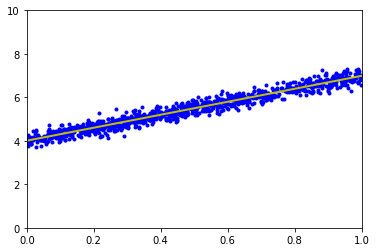

In [ ]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

**Kiểm tra đạo hàm**

- Dựa trên định nghĩa đạo hàm: 
$f^{'}(x) = \lim_{\varepsilon \rightarrow 0} \frac{f(x + \varepsilon) - f(x)}{\varepsilon}$

- Numerical gradient: 
$f^{'}(x) = \lim_{\varepsilon \rightarrow 0} \frac{f(x + \varepsilon) - f(x - \varepsilon)}{2\varepsilon}$

Lý do Numerial gradient được dùng rộng rãi:
- Giải thích bằng hình học

![Explain](https://machinelearningcoban.com/assets/GD/check_grad.png)

- Giải thích bằng giải tích: Khai triển Taylor


**Linear Regression sử dụng Gradient Descent để tối ưu hàm mất mát**

In [ ]:
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g 

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

print( 'Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))


Checking gradient... True


In [ ]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break 
        w.append(w_new)
    return (w, it) 

w_init = np.array([[2], [1]])
(w1, it1) = myGD(w_init, grad, 1)
print('Solution found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Solution found by GD: w =  [[4.02199496 2.95380036]] ,
after 50 iterations.


Thụât toán đã hội tụ nghiệm khá gần với nghiệm của công thức.

*Minh họa thuật toán*

![Minh Hoa](https://machinelearningcoban.com/assets/GD/img1_1.gif)
![Minh Hoa](https://machinelearningcoban.com/assets/GD/img2_1.gif)

**Đường đồng mức (level sets)**

Trong **không gian ba chiều**, khó nhìn được nghiệm có khoảng toạ độ bao nhiêu. Người ta thường dùng một cách vẽ sử dụng khái niệm level sets.

Nếu các bạn để ý trong các bản độ tự nhiên, để miêu tả độ cao của các dãy núi, người ta dùng nhiều đường cong kín bao quanh nhau như sau:

![Ex](http://files.vforum.vn/2016/T06/img/vforum.vn-324944-hinh-44-lc6b0e1bba3c-c491e1bb93-c491e1bb8ba-hc3acnh-te1bb89-le1bb87-le1bb9bn.png)

Các vòng nhỏ màu đỏ hơn thể hiện các điểm ở trên cao hơn.

**Tùy vào điểm khởi tạo mà chúng ta thu được các nghiệm cuối cùng khác nhau**

![Expain](https://machinelearningcoban.com/assets/GD/img3_0.015.gif)





##Gradient Descent (2/2)

**1. Các thuật toán tối ưu Gradient Descent**

- **Momentum**

  **Gradient dưới góc nhìn vật lý**
  ![Image](https://machinelearningcoban.com/assets/GD/momentum.png)
  a) GD trên hàm có 1 local minimum.

  b) GD trên hàm có 2 local minimum, nếu vị trí xuất phát ban đầu khác thì sẽ ra kết quả khác.

  c) GD with momentum, do có đà rơi nên viên bi sẽ thoát khỏi local minimum không mong muốn và tiến đến global minimum.

  **Gradient Descent với Momentum**

  $v_{t} = \gamma v_{t-1} + \eta \nabla_{\theta} J(\theta)$

  - Thường chọn $\gamma$ là một giá trị khoảng $0.9$.
  - $v_{t-1}$ là vận tốc tại thời điểm trước đó.
  - $\nabla_{\theta} J(\theta)$ độ dốc của điểm trước đó.

  Vị trí mới được xác định như sau: $\theta = \theta - v_{t}$


Ví dụ với hàm $f(x) =  x^{2} +  10 \sin(x)$ có 2 điểm local minimum, trong đó có 1 điểm là global minimum.

- Có đạo hàm : $f^{'}(x) = 2x + 10\cos(x)$

![GD](https://machinelearningcoban.com/assets/GD/nomomentum1d.gif)
![GD with Momemtum](https://machinelearningcoban.com/assets/GD/momentum1d.gif)



Chúng ta tạo 1000 điểm dữ liệu được chọn gần với đường thẳng $y = 4 + 3x$

- weight = $[w_{0} = 4, w_{1} = 3]$

In [ ]:
import numpy as np 

np.random.seed(2)
#Khởi tạo dữ liệu giống như trong phần GD (1/2)
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

def gradient(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

# check convergence
def has_converged(theta_new, grad):
    return np.linalg.norm(grad(theta_new))/len(theta_new) < 1e-3

def GD_momentum(theta_init, grad, eta, gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if has_converged(theta_new, grad):
            break 
        theta.append(theta_new)
        v_old = v_new
    return theta 
    # this variable includes all points in the path
    # if you just want the final answer, 
    # use `return theta[-1]`
w_init = np.array([[2], [1]])
w = GD_momentum(w_init, gradient,0.1, 0.9)
print('Solution found by GD_momentum: w = ',w[-1].T)

Solution found by GD_momentum: w =  [[4.00040599 2.97551634]]


- **Nesterov accelerated gradient (NAG)**

Momentum giúp hòn bi vượt qua được dốc local minimum, tuy nhiên có hạn chế là khi gần tới đích, momentum vẫn mất khá nhiều thời gian để dừng lại.

Khắc phục bằng NAG, giúp cho thuật toán hội tụ nhanh hơn.

  **Ý tưởng chính**

    Dự đoán hướng đi trong tương lai

  Thay vì sử dụng gradient của điểm hiện tại, NAG đi trước một bước, sử dụng gradient của điểm tiếp theo.

  ![Ytuong](https://machinelearningcoban.com/assets/GD/nesterov.jpeg)

  - Với momentum thông thường: lượng thay đổi là tổng của hai vector: momentum vector và gradient ở thời điểm hiện tại.
  - Với Nesterove momentum: lượng thay đổi là tổng của hai vector: momentum vector và gradient ở thời điểm được xấp xỉ là điểm tiếp theo.


  **Công thức cập nhật**

  $v_{t} = \gamma v_{t-1} + \eta \nabla_{\theta} J(\theta - \gamma v_{t-1}) \theta = \theta -v_{t}$

  **Minh họa**

  Momentum bên trái - NAG bên phải

  ![GD Mm](https://machinelearningcoban.com/assets/GD/LR_momentum_contours.gif)
  ![NAG](https://machinelearningcoban.com/assets/GD/LR_NAG_contours.gif)


**2. Các biến thể của Gradient Descent**

- **Batch Gradient Descent**

  Thuật toán Gradient Descent chúng ta nói từ đầu phần 1 đến giờ còn được gọi là Batch Gradient Descent. Batch ở đây được hiểu là tất cả, tức khi cập nhật $\theta = w$, chúng ta sử dụng tất cả các điểm dữ liệu $x_{i}$

  - Không phù hợp với cơ sở dữ liệu lớn, việc tính toán đạo hàm của tất cả các điểm này sau mỗi vòng lặp trở nên cồng kềnh và không hiệu quả.
  - Không phù hợp với online learning, khi mà cơ sở dữ liệu được cập nhật liên tục.

- **Stochastic Gradient Descent**

  Tại một thời điểm, ta chỉnh tính đạo hàm của hàm mất mát dựa trên chỉ một điểm dữ liệu $x_{i}$ rồi cập nhập $\theta$ dựa trên đạo hàm này.

  Thực hiện với từng điểm trên toàn bộ dữ liệu, sau đó lặp lại quá trình trên.

  - Mỗi lần duyệt một lượt qua tất cả các điểm trên toàn bộ dữ liệu được gọi là một **epoch**.
    - GD thông thường mỗi epoch là một lần cập nhật $\theta$.
    - SGD mỗi epoch ứng với $N$ lần cập nhật $\theta$ với $N$ là số điểm dữ liệu.
  - Việc cập nhật như thế sẽ làm giảm đi tốc độ thực hiện mỗi epoch. Nhưng SGD chỉ yêu cầu một lượng epoch rất nhỏ ( thường là 10, sau đó dữ liệu mới thì chỉ cân chạy dưới một epoch là đã có nghiệm tốt).

  **Thứ tự lựa chọn điểm dữ liệu**

  Sau mỗi epoch, chúng ta cần shuffle(xáo trộn) thứ tự của các điểm dữ liệu để đảm bảo tính ngẫu nhiên. Việc này ảnh hướng tới hiệu năng của SGD.

  **Quy tắc cập nhật**:
  $\theta = \theta - \eta \nabla_{\theta} J(\theta ;x_{i} ;y_{i})$

    - Trong đó $J(\theta ; x_{i} ; y_{i})$ là hàm mất mát với 1 cặp điểm dữ liệu (input, label) là $(x_{i}, y_{i})$

  **Ví dụ với bài toán Linear Regression**
  
  $\theta = w$, hàm mất mát tại một điểm dữ liệu là:

  $J(w; x_{i}; y_{i}) = \frac{1}{2}(x_{i}w - y_{i})^{2}$

  Đạo hàm theo $w$ tương ứng là:

  $\nabla_{w}J(w;x_{i};y{i}) =  x_{i}^{T}(x_{i}w - y_{i})$

Chúng ta tạo 1000 điểm dữ liệu được chọn gần với đường thẳng $y = 4 + 3x$

- weight = $[w_{0} = 4, w_{1} = 3]$

In [ ]:
import numpy as np
np.random.seed(2)
#Khởi tạo dữ liệu giống như trong phần GD (1/2)
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

# single point gradient
def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return (xi*a).reshape(2, 1)

def SGD(w_init, eta):
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    for it in range(10):
        # shuffle data 
        rd_id = np.random.permutation(N)
        for i in range(N):
            count += 1 
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
            if count%iter_check_w == 0:
                w_this_check = w_new                 
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-3:                                    
                    return w
                w_last_check = w_this_check
    return w

w_init = np.array([[2], [1]])
w = SGD(w_init, 0.1)
print('Solution found by GD: w = ',w[-1].T)

Solution found by GD: w =  [[4.06708447 2.94222754]]


**Minh họa**

Đường đi của nghiệm với SGD

![minhhoa](https://machinelearningcoban.com/assets/GD/LR_SGD_contours.gif)

Giá trị của loss function tại 50 vòng lặp đầu tiên

![loss function](https://machinelearningcoban.com/assets/GD/LR_SGD_loss.png)

    Ưu điểm của SGD - hội tụ rất nhanh



- **Mini-batch Gradient Descent**

  [Tìm hiểu kĩ hơn tại đây](https://ruder.io/optimizing-gradient-descent/index.html#stochasticgradientdescent)

  Khác với SGD, mini-batch sử dụng một lượng $n$ lớn hơn 1( nhưng vẫn nhỏ hơn tổng số dữ liệu $N$ rất nhiều)

  - Bắt đầu bằng việc xáo trộn ngẫu nhiên dữ liệu.
  - Chia toàn bộ dữ liệu thành các mini-batch, mỗi mini-batch có $n$ điểm dữ liệu (trừ mini-batch cuối có thể có ít hơn nếu $N$ không chia hết cho n).
  - Lấy ra một mini-batch để tính đạo hàm rồi cập nhật.

  $\theta = \theta - \eta \nabla_{\theta}J(\theta; x_{i:i+n};y_{i:i+n})$
    - Với $x_{i:i+n}$ được hiểu là dữ liệu từ thứ $i$ tới thứ $i+n-1$
    - Trong Deep Learning. Giá trị $n$ thường được chọn là khoảng từ 50 đến 100.

**3. Stopping Criteria (điều kiện dừng)**

1. Giới hạn số vòng lặp. Nhược điểm có thể thụât toán chưa dừng lại khi đủ gần với nghiệm.
1. So sánh gradient của nghiệm tại hai lần cập nhật liên tiếp. Nhược điểm lớn là việc tính đạo hàm đôi khi trở nên quá phức tạp (ví dụ khi có quá nhiều điểm dữ liệu), nếu áp dụng phương pháp này thì không được lợi khi dùng SGD và mini-batch GD.
1. So sánh giá trị của hàm mất mát của nghiệm hiện tại hai lần cập nhật liên tiếp. Nhược điểm là nếu tại một thời điêm, đồ thị hàm số có dạng bằng phẳng tại một khu vực nhưng khu vực đó không chứa local minimum, thuật toán dừng lại trước khi đạt giá trị mong muốn.
1. Trong SGD và mini-batch GD, cách thường dùng là so sánh nghiệm sau một vài lần cập nhật.

##6. Perceptron Learning Algorithm

Perceptron là một thuật toán Classification cho trường hợp đơn giản nhất: chỉ có hai class (lớp) *(bài toán với chỉ hai class được gọi là binary classification)* và cũng chỉ hoạt động trong một số trường hợp cụ thể.

  ![Find](https://machinelearningcoban.com/assets/pla/pla1.png)
  ![Found](https://machinelearningcoban.com/assets/pla/pla2.png)

Chúng ta cần tìm biên giới (boundary) giữa hai lãnh thổ của 2 class. Trong trường hợp này, điểm dữ liệu mới hình tam giác được phâ vào class đỏ.

**Bài toán Perceptron**

- $X = [x_{1}, x_{2},..., x_{N}] \in R^{d \text{x} N}$ là các ma trận chứa các điểm dữ liệu mà mỗi cột $x_{i} \in R^{d \text{x} 1}$ là một điểm dữ liệu trong không gian $d$ chiều.

- $y =  [y_{1}, y_{2},...,y{N}] \in R^{1 \text{x} N}$ với $y_{i} =1 $ nếu $y_{i} =1$ nếu $x_{i}$ thuộc class 1 (xanh) và $y_{i} = -1$ nếu $x_i} thuộc class 2(đỏ).

Giả sử ta tìm được boundary là đường thẳng có phương trình:

$f_{w}(x) = w_{1}x_{1}+...+w_{d}x_{d}+w_{0} = w^{T}x^{bar} =0$

Để đơn giản, chỉ xét với điểm dữ liệu có d = 2. Giả sử $w_{1}x_{1} + w_{2}x_{2} + w_{0} =0$ chính là nghiệm cần tìm.

![boundary](https://machinelearningcoban.com/assets/pla/pla4.png)

Nhận xét rằng các điểm nằm về cùng 1 phía so với đường thẳng này sẽ làm cho hàm số $f_{w}(x)$ mang cùng dấu. Các dấu này tương đương với nhãn $y$ của mỗi class.

với $w$ là một nghiệm của bài toán Perceptron, với $x$ chưa được gán nhãn, ta có thể xác định class của nó bằng phép toán đơn giản sau:

$label(x) = sgn(w^{T}x)$

Trong đó, $sgn$ là hàm xác định dấu, với giả sử rằng $sgn(0) = 1.$

**Xây dựng hàm mất mát**

![misclassified](https://machinelearningcoban.com/assets/pla/pla3.png)

Các điểm khoanh tròn là các điểm bị misclassified (phân lớp lỗi). Hàm mất mát đơn giản nhất chúng ta nghĩ đến là hàm đếm số lượng các điểm bị miscalssied.

$J_{1}(w) = \sum_{x_{i} \in M}(-y_{i}\ sgn(w^{T}x_{i}))$

  - Trong đó $M$ là tập hợp các điểm bị miscalssified.

Hàm số này là hàm rời rạc không tính đươc đạo hàm theo $w$ nên rất khó tối ưu.

Xét hàm mất mát sau đây:

$J(w) =  \sum_{x_{i} \in M}(-y_{i}\ w^{T}x_{i})$

  - $J()$ khác với $J_{1}()$ ở việc bỏ đi hàm $sgn$.
  - Khi một điểm miscalssified $x_{i}$ nằm càng xa boundary thì giá trị $-y_{i}\ w^{T}x_{i}$ càng lớn, nghĩa là sự sai lệch càng lớn.
  - Giá trị nhỏ nhất của $J()$ cũng bằng 0 nếu không có điểm nào bị misclassifed.
  - Khả vi(tính được đạo hàm).

$\rightarrow$ Hàm mất mát $J()$ tốt hơn.

**Sử dụng SGD để tối ưu hàm mất mát**

- Với một điểm dữ liệu $x_{i}$ bị misclassified, hàm mất mát trở thành:

  $J(w;x_{i};y_{i}) = -y_{i} w^{T} x_{i}$

- Đạo hàm tương ứng:

  $\nabla_{w}J(w;x_{i};y_{i}) = -y_{i}x_{i}$

- Quy tắc cập nhật là: 

  $w = w +\eta y_{i} x_{i}$

Với $\eta$ là learning rate được chọn bằng 1 $\rightarrow$ $w_{t+1} = w_{t} + y_{i}x{i}$.

$\rightarrow$ Với mỗi điểm $x_{i}$ bị miscalssdifed, ta chỉ cần nhân điểm đó với nhãn $y_{i}$ của nó, lấy kết quả cộng vào $w$ ta sẽ được $w$ mới.


Xét từng điểm một, nếu điểm đó bị misclassified thì tiến đường boundary về phía làm cho điểm đó được classifed đúng. Có thể thấy rằng, khi di chuyển đường boundary này, các điểm trước đó được classified đúng có thể lại bị misclassified. Mặc dù vậy, PLA vẫn được đảm bảo sẽ hội tụ sau một số hữu hạn bước. Tức là cuối cùng, ta sẽ tìm được đường phẳng phân chia hai lớp, miễn là hai lớp đó là **linearly separable**.

**Tóm tắt PLA**

1. Chọn ngẫu nhiên một vector hệ số $w$ với các phần tử gần 0.
2. Duyệt ngẫu nhiên qua từng điểm dữ liệu $x_{i}$:

  - Nếu $x_{i}$ được phân đúng lớp, tức $sgn(w^{T}x_{i} = y_{i})$, chúng ta không cần làm gì.
  - Nếu $x_{i}$ bị misclassifed, cập nhật theo $w$ theo công thức:
  $w = w + y_{i}x_{i}$

3. Kiểm tra xem có bao nhiêu điểm bị misclassifed. Nếu không còn điểm nào, dừng thuật toán. Nếu còn quay lại bước 2. 

**Ví dụ trên Python**


In [ ]:
# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
print(X.shape, y.shape)

(3, 20) (1, 20)


In [ ]:
def h(w, x):    
    #Tính đầu ra khi biết đầu vào x và weights w
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w): 
    #Kiểm tra xem thuật toán đã hội tụ chưa, bằng cách so sánh h(w,X) với ground truth y
    return np.array_equal(h(w, X), y) 

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi: # misclassified point
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print('Solution found by PLA: w = ',w[-1].T)
print('Total mis_points = ', len(m))

Solution found by PLA: w =  [[ 3.62346659 -4.77657992  5.03502113]]
Total mis_points =  13


**Minh họa**

![Minh hoa PLA](https://machinelearningcoban.com/assets/pla/pla_vis.gif)

Sau khi cập nhật 18 lần, PLA đã hội tụ. Điểm được khoanh tròn màu đen là điểm misclassified tương ứng được chọn để cập nhật đường boundary.

**Lưu ý**

- PLA có thể cho vô số nghiệm khác nhau.

![EX 1](https://machinelearningcoban.com/assets/pla/pla6.png)

- PLA đòi hỏi dữ liệu linearly separable.

  Hai class trong ví dụ dưới đây tương đối linearly separable. Mỗi class có 1 điểm coi như nhiễu nằm trong khu vực các điểm của class kia. PLA sẽ không làm việc trong trường hợp này vì luôn luôn có ít nhất 2 điểm bị misclassified.

![Ex 2](https://machinelearningcoban.com/assets/pla/pla7.png)


- Pocket Algorithm

  Một cách tự nhiên, nếu có một vài nhiễu, ta sẽ đi tìm một đường thẳng phân chia hai class sao cho có ít điểm bị misclassified nhất. 
  1. Giới hạn số lượng vòng lặp của PLA.
  1. Mỗi lần cập nhật nghiệm $w$ mới, ta đếm xem có bao nhiêu điểm bị misclassified. Nếu là lần đầu tiên, giữ lại nghiệm này trong pocket (túi quần). Nếu không, so sánh số điểm misclassified này với số điểm misclassified của nghiệm trong pocket, nếu nhỏ hơn thì lôi nghiệm cũ ra, đặt nghiệm mới này vào.

**Mô hình Neural Network**

![Image](https://machinelearningcoban.com/assets/pla/pla_nn.png)



##7. Logistic Regession

**Activation function**

Hai mô hình tuyến tính (linear models) **Linear Regression** và **Perceptron Learning Algorithm **(PLA) chúng ta đã biết đều có chung một dạng:

$y = f(w^{T}x)$

- $f()$ được gọi là *activation function*.
- $x$ được hiểu là dữ liệu mở rộng với $x_{0}=1$.
- Một vài activation function:
    - Linear Regression: $f(s) = s$
    - PLA: $f(s) = sgn(s)$

**Logistic Regression**

- Có activation đầu ra dưới dạng xác xuất (probability).
- Giống với linear regression ở phần đầu ra là số thực.
- Giống với PLA ở việc đầu ra bị chặn(trong đoạn $[0,1]$
- Mặc dù chứa từ *regression, logistic regression* thường dùng nhiều hơn cho các toàn toán classification.

**Ví dụ**

  Một nhóm 20 sinh viên dành thời gian trong khoảng từ 0 đến 6 giờ cho việc ôn thi. Thời gian ôn thi này ảnh hưởng đến xác suất sinh viên vượt qua kỳ thi như thế nào?


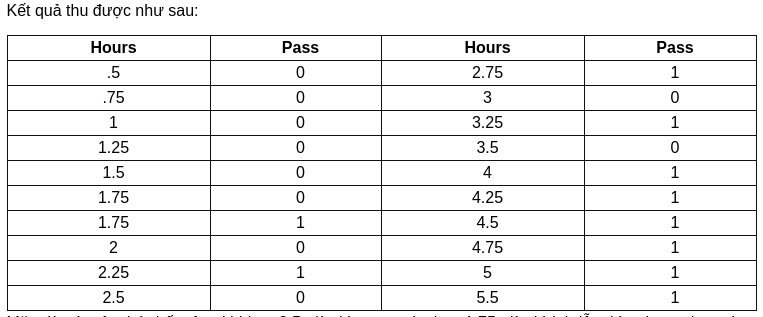

PLA không thể áp dụng được cho bài toán này vì không thể nói một người học bao nhiêu giờ thì 100% trượt hay đỗ, và thực tế là dữ liệu này cũng không linearly separable (điệu kiện để PLA có thể làm việc).

Chúng ta biểu diễn các điểm này trên đồ thị để thấy rõ hơn:

![Ex](https://machinelearningcoban.com/assets/LogisticRegression/ex1.png)

Nhận thấy rằng cả linear regression và PLA đều không phù hợp với bài toán này, chúng ta cần một mô hình flexible hơn.

**Mô hình Logistic Regression**

Đầu ra dự đoán của:
  - Linear Regression: $f(x) = w^{T}x$
  - PLA: $f(x) = sgn(w^{T}x)$
Đầu ra dự đoán của logistic regression thường được viết dưới dạng: $f(x) = \theta(w^{T}x)$

Trong đó $\theta$ được gọi là logistic function.
Một vài activation cho mô hình tuyến tính được cho trong hình dưới đây: 

![Activations](https://machinelearningcoban.com/assets/LogisticRegression/activation.png)

Phân tích các activation:

- Đường màu vàng biểu diễn linear regression:
    - Đường này không bị chặn nên không phù hợp cho bài toán này.
    - Có một trick nhỏ để đưa nó về dạng bị chặn: cắt phần nhỏ hơn 0 bằng cách cho chúng bằng 0, cắt các phần lớn hơn 1 bằng cách cho chúng bằng 1. Sau đó lấy điểm trên đường thẳng này có tung độ bằng 0.5 làm điểm phân chia hai class, đây cũng không phải là một lựa chọn tốt.
    - Giả sử có thêm vài bạn sinh viên tiêu biểu ôn tập đến 20 giờ. Do mô hình lấy mốc 0.5 để phân lớp, thì nhiều sinh viên đỗ sẽ bị dự đoán là trượt.
    ![linear ko phu hop](https://machinelearningcoban.com/assets/LogisticRegression/ex1_lr.png)
- Đường màu đỏ (chỉ khác với activation function của PLA ở chỗ hai class là 0 và 1 thay vì -1 và 1):
    - Cũng thuộc dạng ngưỡng cứng (hard threshold).
    - PLA không hoạt động trong bài toán này vì dữ liệu đã cho không *linearly separable*.
- Các đường màu xanh lam và xanh lục phù hợp với bài toán của chúng ta hơn. Chúng có một vài tính chất quan trọng sau:
    - Là hàm số liên tục nhận giá trị thực, bị chặn trong khoảng $(0,1).
    - Nếu coi điểm có tung độ là 1/2 là điểm phân chia thì các điểm càng xa điểm này về phía bên trái có giá trị càng gần 0. Ngược lại, các điểm càng xa điểm này về phía phải thì có giá trị càng gần 1. Điều này khớp với nhận xét rằng học càng nhiều thì xác suất đỗ càng cao và ngược lại.
    - *Mượt* (smooth) nên có đạo hàm mọi nơi, có thể được lợi trong việc tối ưu.

**Sigmoid function**

Trong các hàm số có 3 tính chất nói trên thì hàm *sigmoid*:

$f(s) = \frac{1}{1+e^{-s}}  \triangleq \sigma(s)$

được sử dụng nhiều nhất, vì nó bị chặn trong khoảng $(0,1)$. thêm nữa:

$\lim_{s \rightarrow - \infty}\sigma(s) = 0$ ;
$\lim_{s \rightarrow + \infty}\sigma(s) = 1$

Đặc biệt hơn nữa:

$\sigma^{'}(s) = \frac{e^{-s}}{(1+e^{-s})^{2}} = \frac{1}{1+e^{-s}} \frac{e^{-s}}{1+e^{-s}}
=\sigma(s)(1-\sigma(s))$

Ngoài ra, hàm *tanh* cũng hay được sử dụng:

$\tanh(s) = \frac{e^{s} - e^{-s}}{e^{s}+e^{-s}}$

Hàm số này nhận giá trị trong khoảng $(-1,1)$ nhưng có thể dễ dàng đưa nó về khoảng $(0,1)$.

$\tanh(s) = 2\sigma(2s)-1$

**Loss function**

- Xác suất để $x$ rơi vào class 1 là $f(w^{T}x)$
- Xác suất để $x$ rơi vào class 0 là $1-f(w^{T}x)$

Với các điểm dữ liệu training(đã biết đầu ra $y$), ta có thể viết:

  - $P(y_{i} =1 | x_{i};w)= f(w^{T}x_{i})$

  - $P(y_{i} =0 | x_{i};w)= 1-f(w^{T}x_{i})$

Trong đó $P(y_{i} =1 | x_{i};w)$ là xác suất xảy ra sự kiện đầu ra $y_{i}=1$ khi biết tham số mô hình $w$ và dữ liệu đầu vào $x_{i}$.

Ký hiệu $z_{i}= f(w^{T}x_{i})$ và viết gộp lại hai biểu thức trên ta có:

  $P(y_{i} =1 | x_{i};w) = z_{i}^{y_{i}}(1-z_{i})^{1-y_{i}}$

Xét toán bộ training set với $X = [x_{1}, x_{2},...,x_{N}] \in R^{d \text{x} N}$ và $y =[y_{1},y_{2},...,y_{N}]$, chúng ta cần tìm $w$ để biểu thức sau đây đạt giá trị lớn nhất:

  $P(y|X;w)$

ở đây, $X,y$ như các biến ngẫu nhiên (random variables). Nói cách khác:

  $w = argmax_{w} P(y|X;w)$

Bài toán trên có tên gọi chung là bài toán *maximum likelihood estimation* với hàm số phía sau $argmax$ được gọi là *likelihood function*.

Giả sử thêm rằng các điểm dữ liệu được sinh ra một cách ngẫu nhiên độc lập với nhau (independent), ta có thể viết:

  $P(y|X;w) = \prod_{i=1}^{N} P(y_{i}|x_{i};w) = \prod_{i=1}^{N} z_{i}^{y_{i}}(1-z_{i})^{1-y_{i}}$

- Trực tiếp tối ưu hàm này theo $w$ không đơn giản.
- Khi N lớn, tích của N số nhỏ hơn 1 có thể dẫn tới numerial error vì tích là một số quá nhỏ.

Giải pháp là lấy logarit tự nhiên (cơ số e) của *likelihood function* biến phép nhân thành phép cộng và đề tránh việc số quá nhỏ. Sau đó lấy ngược dấu để được một hàm và coi nó là hàm mất mát. Lúc này bài toán tìm giá trị lớn nhất (maximum likelihood) trở thành bài toán tìm giá trị nhỏ nhất của hàm mất mát (hàm này còn được gọi là negative log likelihood):

$J(w) = - logP(y|X;w) = -\sum^{N}_{i=1}(y_{i}\log z_{i} + (1-y_{i}) \log(1-z_{i}))$



**Tối ưu loss function**

Sử dụng SGD.

Hàm mất mát với chỉ một điểm dữ liệu $(x_{i},y_{i})$ là:

$J(w;x_{i};y_{i}) = -(y_{i} \log z_{i} + (1 - y_{i}) \log (1-z_{i}))$

Với đạo hàm:

$\frac{\partial J(w;x_{i},y_{i})}{\partial w} 
= - (\frac{y_{i}}{z_{i}} - \frac{1-y_{i}}{1-z_{i}})
\frac{\partial z_{i}}{\partial w}
= \frac{z_{i} - y_{i}}{z_{i}(1-z_{i})}
\frac{\partial z_{i}}{\partial w}$

Để cho biểu thức này trở nên gọn và đẹp hơn, chúng ta sẽ tìm hàm $z = f(w^{T}x)$ sao cho mẫu số bị triệt tiêu. Nếu đặt $s = w^{T}x$, chúng ta sẽ có:

$\frac{\partial z_{i}}{\partial w}
=\frac{\partial z_{i}}{\partial s}
\frac{\partial s}{\partial w}
= \frac{\partial z_{i}}{\partial s} x$ (*)

Một cách trực quan nhất, ta sẽ tìm hàm số $z = f(s)$ sao cho:

$\frac{\partial z}{\partial s} = z(1-z)$

Một cách trực quan nhất, ta sẽ tìm hàm số $z = f(s) sao cho:

$\frac{\partial z}{\partial s} = z(1-z)$ (**)

để triệt tiêu mẫu số trong biểu thức (*). Chúng ta dùng vi phân đơn giản để tìm ra $z$. Phương trình (**) tương đương với:

$\frac{ \partial z}{z(1-z)} = \partial s
\Leftrightarrow
(\frac{1}{z} + \frac{1}{1-z}) \partial z
= \partial s
\Leftrightarrow
\log z - \log (1-z) = s
\Leftrightarrow
\log \frac{z}{1-z} = s
\Leftrightarrow
\frac{z}{1-z} = e^s
\Leftrightarrow
z = e^{s}(1-z)
\Leftrightarrow
z = e^{s} - e^{s}z
\Leftrightarrow
z+e^{s}z=e^{s}
\Leftrightarrow
z= \frac{e^{s}}{1+e^{s}} = \frac {1}{1+e^{-s}} = \sigma(s)
$







**Công thức cập nhật cho logistic sigmoid regression**

- $\frac{ \partial J(w;x_{i} , y_{i}) }{\partial w} = (z_{i} - y_{i})x_{i}$

- $w = w+ \eta(y_{i} - z_{i})x_{i}$

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

In [ ]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


In [ ]:
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


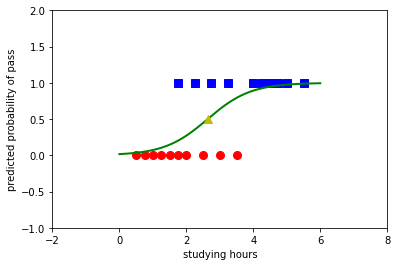

In [ ]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

Nếu như chỉ có hai output là ‘fail’ hoặc ‘pass’, điểm trên đồ thị của hàm sigmoid tương ứng với xác suất 0.5 được chọn làm hard threshold (ngưỡng cứng).

**Ví dụ với dữ liệu 2 chiều**

Chúng ta xét thêm một ví dụ nhỏ nữa trong không gian hai chiều. Giả sử chúng ta có hai class xanh-đỏ với dữ liệu được phân bố như hình dưới.

![Vd](https://machinelearningcoban.com/assets/LogisticRegression/logistic_2d.png)

Kết quả tìm được khi áp dụng mô hình logistic regression được minh họa như hình dưới với màu nền khác nhau thể hiện xác suất điểm đó thuộc class đỏ. Đỏ hơn tức gần 1 hơn, xanh hơn tức gần 0 hơn.

![explain](https://machinelearningcoban.com/assets/LogisticRegression/logistic_2d_2.png)

Nếu phải lựa chọn một ngưỡng cứng (chứ không chấp nhận xác suất) để phân chia hai class, chúng ta quan sát thấy đường thẳng nằm nằm trong khu vực xanh lục là một lựa chọn hợp lý.


**Tính chất của Logistic Regression**

- Logistic Regression thực ra được sử dụng nhiều trong các bài toán Classification.

- Boundary tạo bởi Logistic Regression có dạng tuyến tính.

**Hạn chế**
- Boundary tìm được vẫn có dạng tuyến tính. Vậy nên mô hình này chỉ phù hợp với loại dữ liệu mà hai class là gần với linearly separable.

- Một hạn chế nữa của Logistic Regression là nó yêu cầu các điểm dữ liệu được tạo ra một cách độc lập với nhau. Trên thực tế, các điểm dữ liệu có thể bị ảnh hưởng bởi nhau.

**Biểu diễn Neural Networks**

![LN](https://machinelearningcoban.com/assets/LogisticRegression/3models.png)


##8. Feature Engineering

5 thuật toán Machine Learning cơ bản: **Linear Regression**, **K-means Clusterning**, **K-nearest neighbors**, **Perceptron Learning Algorithm** và **Logistic Regression.**

Trong tất cả các thuật toán này, các điểm dữ liệu được biểu diễn bằng các vector, được gọi là **feature vector**, có độ dài bằng nhau, và cùng là vector cột hoặc vector hàng. Tu nhiên trong thực tế, mọi chuyện không được tốt đẹp như vậy!

- Với các bài toán về Computer Vision:
  - Các bức ảnh là các ma trận có kích thước khác nhau.
  - Để nhận dạng vật thể, thậm chí ta phải thêm một bước object detection(tìm khung chứa vật thể cần dự đoán).
  - Ảnh còn phụ thuộc vào góc chụp, ánh sáng, .. và rất nhiều yếu tố khác nữa.
- Các bài toán NLP(Natural Language Processing - Xử lý ngôn ngữ tự nhiên).
  - Độ dài các văn bản là khác nhau.
  - Có những từ rất hiếm hoặc không có trong từ điển.
  - Cũng có khi thêm một vài từ vào văn bản mà nội dung văn bản không đổi hoặc haofn toàn mang nghĩa trái ngược.
  - Cùng 1 câu nói nhưng tốc độ, âm giọng của mỗi người khác nhau. Thậm chí của cùng một người nhưng lúc ôm lúc khỏe cũng khác nhau.

Trong các bài toán thực tế chúng ta chỉ có được dữ liệu thô(raw) chưa qua chỉnh sửa, chọn lọc.

Phải tìm một phép biến đổi để loại những dữ liệu nhiễu (noise), và để đưa raw với số chiều khác nhau về cùng một chuẩn(vùng vector hoặc ma trận). Dữ liệu phải đảm bảo được các thông tin đặc trưng(features) cho raw.

Tùy vào bài toán, cần thiết kế những phép biến đổi để có những feature phù hợp.

Đây chính là Feature Extraction, hoặc Feature Engineering (trích đặc trưng).





**Mô hình chung cho các bài toán Machine Learning**

![Model](https://machinelearningcoban.com/assets/FeatureEngineering/ML_models.png)

**TRAINING PHASE**

- Feature Extractor
    - Đầu ra: Tạo ra một Feature Extractor biến dữ liệu thô ban đầu thành dữ liệu phù hợp với từng mục đích khác nhau.
    - Đầu vào:
      - raw training input:
        - Raw input là tất cả các thông tin ta biết về dữ liệu.
        - Dữ liệu thô này thường không ở dạng vector, không có số chiều như nhau. Thậm chí có thể có số chiều như nhau nhưng số chiều quá lớn, như một bức ảnh màu 1000 pixel x 1000 pixel. Đây là một con số quá lớn, không lợi cho lưu trữ và tính toán.
      - (optional) output của training set:
        - Trong các bài toán Unsupervised learning, ta không biết output nên hiển nhiên sẽ không có đầu vào này.
        - Trong các bài toán Supervised learning, có khi dữ liệu này cũng không được sử dụng.
          - Ví dụ: nếu raw input đã có cùng số chiều rồi nhưng số chiều quá lớn, ta muốn giảm số chiều của nó thì cách đơn giản nhất là chiếu vector đó xuống một không gian có số chiều nhỏ hơn bằng cách lấy một ma trận ngẫu nhiên nhân với nó.
          - Ví dụ, dữ liệu thô là các hình vuông và hình tam giác có màu đỏ và xanh. Trong bài toán phân loại đa giác, các output là tam giác và vuông, thì ta không quan tâm tới màu sắc mà chỉ quan tâm tới số cạnh của đa giác. Ngược lại, trong bài toán phân loại màu, các class là xanh và đỏ, ta không quan tâm tới số cạnh mà chỉ quan tâm đến màu sắc thôi.
      -(optional) Prior knowledge about data:
        - Đôi khi những giả thiết khác về dữ liệu cũng mang lại lợi ích. Ví dụ, trong bài toán classification, nếu ta biết dữ liệu là (gần như) linearly separable thì ta sẽ đi tìm một ma trận chiếu sao cho ở trong không gian mới, dữ liệu vẫn đảm bảo tính linearly separable, việc này thuận tiện hơn cho phần classification vì các thuật toán linear, nhìn chung, đơn giản hơn.

  Sau khi học được feature extractor thì ta cũng sẽ thu được extracted features cho raw input data. Những extracted features này được dùng để huấn luyện các thuật toán Classification, Clustering, Regression,… ở phía sau.

- Main Algorithms

  - Khi có được extracted features rồi, chúng ta sử dụng những thông tin này cùng với (optional) training output và (optional) prior knowledge để tạo ra các mô hình phù hợp, điều mà chúng ta đã làm ở những bài trước.
  - Trong một số thuật toán cao cấp hơn, việc huấn luyện feature extractor và main algorithm được thực hiện cùng lúc với nhau chứ không phải từng bước như trên.

**TESTING PHASE**

Với raw input mới, ta sử dụng feature extractor đã tạo được ở trên (tất nhiên không được sử dụng output của nó vì output là cái ta đang đi tìm) để tạo ra feature vector tương ứng. Feature vector được đưa vào main algorithm đã được học ở training phase để dự đoán output.




**Một số ví dụ về Feature Engineering**

1. Trực tiếp lấy raw data
  - Với bài toán phân loại chữ số viết tay trong bộ cơ sở dữ liệu MNIST, mỗi bức ảnh có số chiều là 28 pixel x 28 pixel (tất nhiên việc crop và chỉnh sửa mỗi bức ảnh đã được thực hiện từ trước rồi, đó đã là một phần của feature engineering rồi). Một cách đơn giản thường được dùng là kéo dài ma trận 28x28 này để được 1 vector có số chiều 784. Trong cách này, các cột (hoặc hàng) của ma trận ảnh được đặt chồng lên (hoặc cạnh nhau) để được 1 vector dài. Vector dài này được trực tiếp sử dụng làm feature đưa vào các bộ classifier/clustering/regression/… Lúc này, giá trị của mỗi pixel ảnh được coi là một feature.
  - Rõ ràng việc làm đơn giản này đã làm mất thông tin về không gian (spatial information) giữa các điểm ảnh, tuy nhiên, trong nhiều trường hợp, nó vẫn mang lại kết quả khả quan.

1. Feature selection
  - Giả sử rằng các điểm dữ liệu có số features khác nhau (do kích thước dữ liệu khác nhau hay do một số feature mà điểm dữ liệu này có nhưng điểm dữ liệu kia lại không thu thập được), và số lượng features là cực lớn. Chúng ta cần chọn ra một số lượng nhỏ hơn các feature phù hợp với bài toán. Chọn thế nào và thế nào là phù hợp lại là một bài toán khác, tôi sẽ không bàn thêm ở đây.

1. Dimensionality reduction
  - Một phương pháp nữa tôi đã đề cập đó là làm giảm số chiều của dữ liệu để giảm bộ nhớ và khối lượng tính toán. Việc giảm số chiều này có thể được thực hiện bằng nhiều cách, trong đó random projection là cách đơn giản nhất. Tức chọn một ma trận chiếu (projection matrix) ngẫu nhiên (ma trận béo) rồi nhân nó với từng điểm dữ liệu (giả sử dữ liệu ở dạng vector cột) để được các vector có số chiều thấp hơn. Ví dụ, vector ban đầu có số chiều là 784, chọn ma trận chiếu có kích thước (100x784), khi đó nếu nhân ma trận chéo này với vector ban đầu, ta sẽ được một vector mới có số chiều là 100, nhỏ hơn số chiều ban đầu rất nhiều. Lúc này, có thể ta không có tên gọi cho mỗi feature nữa vì các feature ở vector ban đầu đã được trộn lẫn với nhau theo một tỉ lệ nào đó rồi lưu và vector mới này. Mỗi thành phần của vector mới này được coi là một feature (không tên).
  - Việc chọn một ma trận chiếu ngẫu nhiên đôi khi mang lại kết quả tệ không mong muốn vì thông tin bị mất đi quá nhiều. Một phương pháp được sử dụng nhiều để hạn chế lượng thông tin mất đi có tên là Principle Component Analysis.

1. Bag-of-words
  -  Giả sử chúng ta có bài toán phân loại tin rác. Ta thấy rằng nếu một tin có chứa các từ khuyến mại, giảm giá, trúng thưởng, miễn phí, quà tặng, tri ân, … thì nhiều khả năng đó là một tin nhắn rác. Vậy phương pháp đơn giản nhất là đếm xem trong tin đó có bao nhiêu từ thuộc vào các từ trên, nếu nhiều hơn 1 ngưỡng nào đó thì ta quyết định đó là tin rác.

  - Giả sử chúng ta có hai văn bản đơn giản:
    - (1) John likes to watch movies. Mary likes movies too.
    - (2) John also likes to watch football games.
  - Dựa trên hai văn bản này, ta có danh sách các từ được sử dụng, được gọi là từ điển với 10 từ như sau: 
    
    ["John", "likes", "to", "watch", "movies", "also", "football", "games", "Mary", "too"]
  - Với mỗi văn bản, ta sẽ tạo ra một vector đặc trưng có số chiều bằng 10, mỗi phần tử đại diện cho số từ tương ứng xuất hiện trong văn bản đó. Với hai văn bản trên, ta sẽ có hai vector đặc trưng là:

    - (1) [1, 2, 1, 1, 2, 0, 0, 0, 1, 1]

    - (2) [1, 1, 1, 1, 0, 1, 1, 1, 0, 0] 

  - Lưu ý:
    - Với những ứng dụng thực tế, từ điển có nhiều hơn 10 từ rất nhiều, có thể đến một trăm nghìn hoặc cả triệu, như vậy vector đặc trưng thu được sẽ rất dài. Một văn bản chỉ có 1 câu, và 1 tiểu thuyết nghìn trang đều được biểu diễn bằng các vector có số chiều bằng 100 nghìn hoặc 1 triệu.
    - Có thể đến một trăm nghìn hoặc cả triệu, như vậy vector đặc trưng thu được sẽ rất dài. Một văn bản chỉ có 1 câu, và 1 tiểu thuyết nghìn trang đều được biểu diễn bằng các vector có số chiều bằng 100 nghìn hoặc 1 triệu. Để việc lưu trữ được hiệu quả hơn, ta không lưu cả vector đó mà chỉ lưu vị trí của các phần tử khác 0 và giá trị tương ứng. Lưu ý: nếu có hơn 50% số phần tử khác 0, việc làm này lại phản tác dụng!
    - Thi thoảng có những từ hiếm gặp không nằm trong từ điển, vậy ta sẽ làm gì? Một cách thường được dùng là mở rộng vector đặc trưng thêm 1 phần tử, gọi là phẩn tử \<Unknown>. Mọi từ không có trong từ điền đều được coi là \<Unknown>.
    - Những từ hiếm đôi khi lại mang những thông tin qua trọng nhất mà chỉ loại văn bản đó có. Đây là một nhược điểm của BoW. Có một phương pháp cải tiến khác giúp khắc phục nhược điểm này có tên là Term Frequency-Inverse Document Frequency (TF-IDF) dùng để xác định tầm quan trọng của một từ trong một văn bản dựa trên toàn bộ văn bản trong cơ sở dữ liệu (corpus).
    - Nhược điểm lớn nhất của BoW là nó không mang thông tin về thứ tự của các từ. Cũng như sự liên kết giữa các câu, các đoạn văn trong văn bản. Ví dụ, ba câu sau đây: “Em yêu anh không?”, “Em không yêu anh”, và “Không, (nhưng) anh yêu em” khi được trích chọn đặc trưng bằng BoW sẽ cho ra ba vector giống hệt nhau, mặc dù ý nghĩa khác hẳn nhau.
1. Bag-of-Words trong Computer Vision

  **Ví dụ 1:**

    Có hai class ảnh, một class là ảnh các khu rừng, một class là ảnh các sa mạc. Phân loại một bức ảnh là rừng hay sa mạc (giả sử ta biết rằng nó thuộc một trong hai loại này) một cách trực quan nhất là dựa vào màu sắc. Màu xanh nhiều thì là rừng, màu đỏ và vàng nhiều thì là sa mạc.

  - Với một bức ảnh, chuẩn bị một vector $x$ có số chiều bằng 3, đại diện cho 3 màu xanh $(x_{1})$, đỏ $(x_{2})$, và vàng $(x_{3})$.

  - Với mỗi điểm ảnh trong bức ảnh đó, xem nó gần với màu xanh, đỏ hay vàng nhất dựa trên giá trị của pixel đó. Nếu nó gần điểm xanh nhất, tăng $x_{1}$ lên 1; gần đỏ nhất, tăng $x_{2}$ lên 1; gần vàng nhất, tăng $x_{3}$ lên 1.

  - Sau khi xem xét tất cả các điểm ảnh, dù cho bức ảnh có kích thước thế nào, ta vẫn thu được một vector có độ dài bằng 3, mỗi phần tử thể hiện việc có bao nhiêu pixel trong bức ảnh có màu tương ứng. Vector cuối này còn được gọi là vector histogram của bức ảnh tương ứng với ba màu xanh, đỏ, vàng. Dựa vào vector này, ta có thể quyết định bức ảnh đó là ảnh rừng hay sa mạc.

  **Ví dụ 2:**

    Trên thực tế, các bài toán xử lý ảnh không đơn giản như ví dụ 1 trên đây. Mắt người thực ra nhạy với các đường nét, hình dáng hơn là màu sắc. Một cái (ảnh) cây dù không có màu vẫn là một cái (ảnh) cây! Vì vậy, xem xét giá trị từng điểm ảnh một không mang lại kết quả khả quan vì lượng thông tin bị mất quá nhiều.

    Có một cách khắc phục là thay vì xem xét một điểm ảnh, ta xem xét một cửa sổ nhỏ trong ảnh (trong Computer Vision, cửa sổ này được gọi là patch) là một hình chữ nhật chứa nhiều điểm ảnh gần nhau. Cửa sổ này đủ lớn để có thể chứa được các bộ phận có thể mô tả được vật thể trong ảnh.

    Ví dụ với mặt người, các patch nên đủ lớn để chứa được các phần của khuôn mặt như mắt, mũi, miệng như hình dưới đây.

    ![Vidu](https://machinelearningcoban.com/assets/FeatureEngineering/bow_face.png)

    Tương tự thế, với ảnh là ô tô, các patch thu được có thể là bánh xe, khung xe, cửa xe, … như hàng trên trong hình dưới đây.

    ![Vidu](https://machinelearningcoban.com/assets/FeatureEngineering/bow_car.png)

  - Xác suất để hai patches giống hệt nhau từng pixel là rất thấp vì có thể một phần của vật thể trong một patch bị lệch đi vài pixel so với phần đó trong patch kia; hoặc phần vật thể trong patch bị méo, hoặc có độ sáng khác nhau, mặc dù ta vẫn nhìn thấy hai patches đó rất giống nhau.
  - Hai patches là gần giống nhau nếu khoảng cách Euclid giữa hai vector tạo bởi hai patches đó gần nhau. Từ điển (codebook) sẽ có số phần tử do ta tự chọn. Số phần tử càng cao thì độ sai lệch càng ít, nhưng sẽ nặng về tính toán hơn.
  - Chúng ta có thể áp dụng K-means clustering. Với rất nhiều patches thu được. Với ảnh trong tập test data, ta cũng lấy các patches rồi xem chúng rơi vào những bags nào. Từ đó suy ra vector đặc trưng cho mỗi bức ảnh. 

1. Feature Scaling and Normalization

  - Các điểm dữ liệu đôi khi được đo đạc với những đơn vị khác nhau, m và feet chẳng hạn. Hoặc có hai thành phần (của vector dữ liệu) chênh lệch nhau quá lớn, một thành phần có khoảng giá trị từ 0 đến 1000, thành phần kia chỉ có khoảng giá trị từ 0 đến 1 chẳng hạn. Lúc này, chúng ta cần chuẩn hóa dữ liệu trước khi thực hiện các bước tiếp theo.

 - Chú ý: việc chuẩn hóa này chỉ được thực hiện khi vector dữ liệu đã có cùng chiều.

  - Một vài phương pháp chuẩn hóa thường dùng:
    - Rescaling
      Phương pháp đơn giản nhất là đưa tất cả các thành phần về cùng một khoảng, $[0,1]$ hoặc $[-1,1]$. Ví dụ nếu muốn đưa một thành phần (feature) về khoảng $[0,1]$ công thức sẽ là:

    $ x^{'} = \frac {x-\min(x)}{\max(x) - \min(x)}$

    - Standardization
      Một phương pháp nữa cũng hay được sử dụng là giả sử mỗi thành phần đều có phân phối chuẩn với kỳ vọng là 0 và phương sai là 1. Khi đó, công thức chuẩn hóa sẽ là:

    $x^{'} = \frac{x-x^{bar}}{\sigma}$

      Trong đó $x^{bar}, \sigma$ lần lượt là kỳ vọng và phương sai (standard deviation) của thành phần đó trên toàn bộ training data.

    - Scaling to unit length

      Một lựa chọn khác nữa cũng được sử dụng rộng rãi là chuẩn hóa các thành phần của mỗi vector dữ liệu sao cho toàn bộ vector có độ lớn (Euclid, tức norm 2) bằng 1. Việc này có thể được thực hiện bằng:

    $x^{'} = \frac{x}{\parallel x \parallel_{2}}$

##9. Binary Classifiers

Perceptron Learning Algorithm và Logistic Regression được xếp vào Binary Classifiers vì chúng được xây dựng dựa trên ý tưởng về các bài toán classification với chỉ hai classes.

**Binary Classifiers cho Multi-class Classification problems**

1. One-vs-one

  Xây dựng rất nhiều bộ binary classifiers cho từng cặp classes. Bộ thứ nhất phân biệt class 1 và class 2, bộ thứ hai phân biệt class 1 và class 3, … Khi có một dữ liệu mới vào, đưa nó vào toàn bộ các bộ binary classifiers trên. Kết quả cuối cùng có thể được xác định bằng cách xem class nào mà điểm dữ liệu đó được phân vào nhiều nhất (major voting). Hoặc với Logistic Regression thì ta có thể tính tổng các xác suất tìm được sau mỗi bộ binary classifier.

  Như vậy, tổng số binary classifiers phải dùng là rất lớn, không có lợi về mặt tính toán.

1. Hierarchical (phân tầng)

  Các làm như one-vs-one sẽ mất rất nhiều thời gian training vì có quá nhiều bộ phân lớp cần được xây dựng. Một cách khác giúp tiết kiệm số binary classifiers hơn đó là hierarchical.

  Ví dụ với MNIST với 4 chữ số 4, 5, 6, 7. Vì ta thấy chữ số 4 và 7 khá giống nhau, chữ số 5 và 6 khá giống nhau nên trước tiên chúng ta xây dựng bộ phân lớp [4, 7] vs [5, 6]. Sau đó xây dựng thêm hai bộ 4 vs 7 và 5 vs 6 nữa. Tổng cộng, ta cần 3 bộ binary classifiers. Chú ý rằng có nhiều cách chia khác nhau, ví dụ [4, 5, 6] vs 7, [4, 5] vs 6, rồi 4 vs 5.

  Ưu điểm của phương pháp này là sử dụng ít bộ binary classifiers hơn one-vs-one. Hạn chế lớn nhất của nó là việc nếu chỉ một binary classifier cho kết quả sai thì kết quả cuối cùng chắc chắn sẽ sai. Ví dụ, nếu 1 ảnh chứa chữ số 5, nhưng ngay bước đầu tiên đã bị misclassifed sang nhánh [4, 7] thì kết quả cuối cùng sẽ là 4 hoặc 7, cả hai đều sai.

1. Binary coding

  Mã hóa output của mỗi class bằng một số nhị phân.

  Ví dụ có 4 class thì các class sẽ được mã hóa thành 00,01,10,11.

  Binary classifier thứ nhất đi tìm bit đầu tiên của output, Binary classifier thứ hai đi tìm bit thứ 2.

  Cách làm này sử dụng một số lượng nhỏ nhất các bộ binary classifiers. Nhưng nó có một hạn chế rất lớn là chỉ cần một bit bị phân loại sai sẽ dẫn đến dữ liệu bị phân loại sai. Hơn nữa, nếu số classes không phải là lũy thừa của hai, mã nhị phân nhận được có thể là một giá trị không tương ứng với class nào!

1. one-vs-rest hay one-hot coding

  Phương pháp được sử dụng nhiều nhất là one-vs-rest (một số tài liệu gọi là ove-vs-all, one-against-rest, hoặc one-against-all).

  Phương pháp này còn được gọi là one-hot coding (được sử dụng nhiều nên có rất nhiều tên) vì với cách mã hóa trên, giả sử có 4 classes, class 1, 2, 3, 4 sẽ lần lượt được mã hóa dưới dạng nhị phân bởi 1000, 0100, 0010 hoặc 0001. One-hot vì chỉ có one bit là hot (bằng 1).

  Giúp phân biệt class i vs not class i, tức xem một điểm có thuộc class i hay không, hoặc xác suất để một điểm rơi vào class i là bao nhiêu.


- Phân tích:

![phan phoi](https://machinelearningcoban.com/assets/LogReg2/dist.png)

  a) Cả 4 phương pháp đều có thể áp dụng được.
  
  b) one-vs-rest không phù hợp vì class màu xanh lục và class rest (hợp của xanh lam và đỏ) là không linearly separable.

  c) Tương tự như trên, ba class lam, lục, đỏ thẳng hàng nên sẽ không dùng được one-vs-rest.

**Biểu diễn dưới dạng Neural Networks**

![BieuDien](https://machinelearningcoban.com/assets/LogReg2/binaryclassifiers.png)

Công thức cập nhật của logistic sigmoid regression:

  $w = w+ \eta(y_{i} - z_{i})x_{i}$

Có thể tổng quát thành:

  $W = W + \eta(y_{i} - z_{i})x_{i}$

  Với $W,y_{i}, z_{i}$ lần lượt là ma trận trọng số, vector (cột) output thật với toàn bộ các binary classifiers tương tứng với điêm dữ liệu $x_{i}$, và vector output tìm được của networks tại thời điểm đang xét nếu đầu vào mỗi network là $x_{i}$. 

  Chú ý rằng với Logistic Regression, vector $y_{i}$ là một binary vector, vector $z_{i}$ gồm các phần tử nằm trong khoảng $(0,1)$.

**Hạn chế của one - vs - rest**

  Tổng các xác xuất đầu ra không bằng 1, chưa được hợp lí lắm.


##10. Softmax Regression

**Mô hình one-vs-rest**

![Model](https://machinelearningcoban.com/assets/13_softmax/onevsrest.png)

Chúng ta cần xây dựng $C$ Logistic Regression khác nhau. Các đầu ra dự đoán được tính theo hàm sigmoid:

$a_{i} =  sigmoid(z_{i}) = sigmoid(w^{T}_{i}x)$

**1. Softmax function**

$a_{i} = \frac{exp(z_{i})}{\sum_{j=1}^{C}exp(z_{j})}$ với mọi $i = 1,2,...,C$

Giả sử rằng:

$P(y_{k} = i|x_{k};W) = a_{i}$

Trong đó, $P(y=i|x;W)$ được hiểu là xác xuất để một điểm dữ liệu $x$ rơi vào class thứ $i$ nếu biết tham số mô hình (ma trận trọng số) là $W$

**Mô hình Sofmax Regression**

![Model](https://machinelearningcoban.com/assets/13_softmax/softmax_nn.png)



*Ví dụ*

- Màu tím là **sorces**
- Màu đỏ là đầu ra của Softmax

![Example](https://machinelearningcoban.com/assets/13_softmax/softmax_ex.png)



**Sofmax function trong Python**

In [ ]:
import numpy as np 

def softmax(Z):
    """
    Compute softmax values for each sets of scores in V.
    each column of V is a set of score.    
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

**Softmax stable**

Khi một trong các giá trị $z_{i}$ quá lớn, việc tính toán $exp(z_{i})$ có thể gây ra hiện tượng tràn số (overflow). Đây là cách khắc phục:

$\frac{exp(z_{i})}{\sum_{j=1}{C} exp(z_{j})}
= \frac{exp(-c)exp(z_{i})}{exp(-c)\sum_{j=1}^{C}exp(z_{j})}
= \frac{exp(z_{i}-c}{\sum_{j=1}^{C}exp(z_{j}-c)}$

Phương pháp đơn giản là trừ tất cả $z_{i}$ đi một giá giá trị đủ lớn. Thường được chọn là $c=max_{i}z_{i}$


In [ ]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

**2. Hàm mất mát và phướng án tối ưu**

- **One hot coding:**

  $J(W) = \sum_{i=1}^{N}\parallel a_{i} - y_{i} \parallel_{2}^{2}$

 **Tuy nhiên đây chưa phải là một lựa chọn tốt.** Khi đánh giá sự khác nhau (hay khoảng cách) giữa hai phân bố xác suất (probability distributions).

- **Cross Entropy**

  Cross entropy giữa hai phân phối $p$ và $q$ được định nghĩa là:

  $H(p,q) = E_{p}[-\log(q)]$

  Với $p$ và $q$ rời rạc (như $y$ và $a$ trong bài toán của chúng ta), công thức này được viết dưới dạng:

  $H(p,q) = -\sum_{i=1}^{C}p_{i}\log(q_{i})$

So sánh giữa cross entropy và hàm bình phương khoảng cách thông thường. Trong trường hợp $C = 2$ và $p_{1}$ lần lượt nhận các giá trị.

![p=0.5](https://machinelearningcoban.com/assets/13_softmax/crossentropy1.png)
![p=0.1](https://machinelearningcoban.com/assets/13_softmax/crossentropy2.png)
![p=0.8](https://machinelearningcoban.com/assets/13_softmax/crossentropy3.png)


Nhận xét:
  - Giá trị nhỏ nhất của cả hai hàm số đạt được khi $q=p$ tại hoành độ của các điểm màu xanh lục.
  - Hàm cross entropy nhận giá trị rất cao (tức loss rất cao) khi $q$ ở xa $p$. Những điểm ở xa với $p$ hơn vì những nghiệm ở xa bị trừng phạt rất nặng.
  - Đầu ra của sofmax không có giá trị nào tuyệt đối bằng 0 cả.

**Hàm mất mát cho Logistic Regression**

- Đầu ra thực sự của điểm dữ liệu đầu vào $x_{i}$ có phân phối xác suất là $[y_{i};1-y_{i}]$ với $y_{i}$ là xác suất để điểm dữ liệu đầu vào rơi vào class thứ nhất( bằng 1 nếu $y_{i} =1$, bằng 0 nếu $y_{i}=0$.

- Đầu ra dự đoán của điểm dữ liệu đó là $a_{i} = sigmoid(w^{T}x)$ là xác suất để điểm đó rơi vào class thứ nhất. Xác suất để điểm đó rơi vào class thứ 2 có thể được dễ dàng suy ra là $1-a_{i}$. 

$J(w) = -\sum_{i=1}^{N}(y_{i} \log a_{i} + (1-y_{i}) \log (1-a_{i}))$

**Với Softmax Regression**

Trong trường hợp có $C$ classes, loss giữa đầu ra dự đoán và đầu ra thực sự của một điểm dữ liệu $x_{i}$ được tính bằng:

$J(W;x_{i},y_{i}) = -\sum _{j=1}^{C} y_{ij} \log(a_{ij})$

Với $y_{ij}$ và $a_{ij}$ lần lượt là phần tử thứ $j$ của vector (xác xuất) $y_{i}$ và $a_{i}$.




**Hàm mất mát cho Softmax Regression**

$J(W;X,Y) = -\sum_{i=1}^{N} \sum_{j=1}^{c} y_{ij}\log (a_{ij}) = -\sum_{i=1}^{N} \sum_{j=1}^{c} y_{ij} \log ( \frac{exp(w_{j}^{T}x_{i})}{\sum_{k=1}^{C} exp (w_{k}^{T}x_{i})})$

**Tối ưu hàm mất mát**

Dùng Stochastic Gradient Descent

Với chỉ một cặp dữ liệu $(x_{i}, y{i})$, ta có:

$J_{i}(W) \triangleq J(W;x_{i},y_{i})
= -\sum_{j=1}{C} y_{ij} \log(\frac{exp(w_{j}^{T}x_{i})}{\sum_{k=1}^{C} exp (w_{k}^{T}x_{i})})
= -\sum_{j=1}^{C} (y_{ij} w_{j}^{T} x_{i} - y_{ij} \log (\sum_{k=1}^{C} exp(w_{k}^{T} x_{i}))
= -\sum_{j=1}^{C} y_{ij} w_{j}^{T} x_{i} - \log (\sum_{k=1}^{C} exp(w_{k}^{T} x_{i}))$

Trong biến đổi ở dòng cuối cùng, tôi đã sử dụng quan sát: $\sum_{j=1}^{C} y_{ij} = 1$ vì nó là tổng xác xuất.

$\frac{\partial J_{i}(W)}{\partial W} = [\frac{\partial J_{i}(W)}{\partial w_{1}},\frac{\partial J_{i}(W)}{\partial w_{2}},...,\frac{\partial J_{i}(W)}{\partial w_{C}}]$

Trong đó, gradient theo từng cột có thể tính được dựa theo:

$\frac{\partial J_{i}(W)}{\partial w_{j}}
= - y_{ji}x_{i} + \frac{exp(w_{j}^{T}x_{i})}{\sum_{k=1}^{C} exp (w_{k}^{T}x_{i})} x_{i}
= -y_{ji} x_{i} + a_{ij}x_{i}
= x_{i}(a_{ji}-y_{ji}) 
= e_{ji}x_{i} (\text{where } e_{ji} = a{ji} - y_{ji}) $

Giá trị $e_{ji} = a{ji} - y_{ji}$ có thể coi là sai số dự đoán.

Đến đây ta được:

$\frac{\partial J_{i}(W)}{\partial W} = x_{i}[e_{1i},e_{2i},...,e_{Ci}] = x_{i} e_{i}^{T}$

Suy ra:

$\frac{\partial J_{i}(W)}{\partial W} = \sum_{i=1}^{N} x_{i}e^{T}_{i} = X E^{T}$

Với $E = A - Y$

Công thức cập nhập $W$ là:

$W = W + \eta x_{i} (y_{i} - a_{i})^{T}$

Công thức này giống với công thức cập nhật của Logistic Regression. Khi $C=2$ Softmax Regression và Logistic Regression là giống nhau.





**Coding with Python**

In [ ]:
import numpy as np 

# randomly generate data 
N = 2 # number of training sample 
d = 2 # data dimension 
C = 3 # number of classes 

X = np.random.randn(d, N)
y = np.random.randint(0, 3, (N,))

In [ ]:
## One-hot coding
from scipy import sparse 
def convert_labels(y, C = C):
    """
    convert 1d label to a matrix label: each column of this 
    matrix coresponding to 1 element in y. In i-th column of Y, 
    only one non-zeros element located in the y[i]-th position, 
    and = 1 ex: y = [0, 2, 1, 0], and 3 classes then return

            [[1, 0, 0, 1],
             [0, 0, 1, 0],
             [0, 1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

Y = convert_labels(y, C)

In [ ]:
# cost or loss function  
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

W_init = np.random.randn(d, C)

def grad(X, Y, W):
    A = softmax((W.T.dot(X)))
    E = A - Y
    return X.dot(E.T)
    
def numerical_grad(X, Y, W, cost):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps 
            W_n[i, j] -= eps
            g[i,j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g 

g1 = grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init, cost)

print(np.linalg.norm(g1 - g2))


2.57854378490851e-10


In [ ]:
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]    
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W
eta = .05 
d = X.shape[0]
W_init = np.random.randn(d, C)

W = softmax_regression(X, y, W_init, eta)
# W[-1] is the solution, W is all history of weights

In [ ]:
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

**Implement with Simulated data**



In [ ]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# each column is a datapoint
X = np.concatenate((X0, X1, X2), axis = 0).T 
# extended data
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

![PhanBo](https://machinelearningcoban.com/assets/13_softmax/ex1_1.png)

In [ ]:
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

[[ 7.72019671 -4.04924731 -4.27388062]
 [-1.07251389  1.446264   -1.01280302]
 [-0.3561936  -0.32454174  2.64839589]]


![KetQua](https://machinelearningcoban.com/assets/13_softmax/ex1_2.png)

- Boundary tạo bởi Softmax Regression là linear.
- Softmax Regression là một trong hai classifiers phổ biến nhất.

##11. Multi-layer Perceptron và Backpropagation

**1.PLA cho các hàm logic co bản.**

Ta sẽ xét khả năng biểu diễn (representation) của PLA cho các bài toán binary đơn giản: biểu diễn các hàm số logic NOT, AND, OR, và XOR (output bằng 1 nếu và chỉ nếu hai input khác nhau). Để có thể sử dụng PLA (output là 1 hoặc -1), chúng ta sẽ thay các giá trị bằng 0 của output của các hàm này bởi -1. các điểm hình vuông màu xanh là các điểm có label bằng 1, các điểm hình tròn màu đỏ là các điểm có label bằng -1.

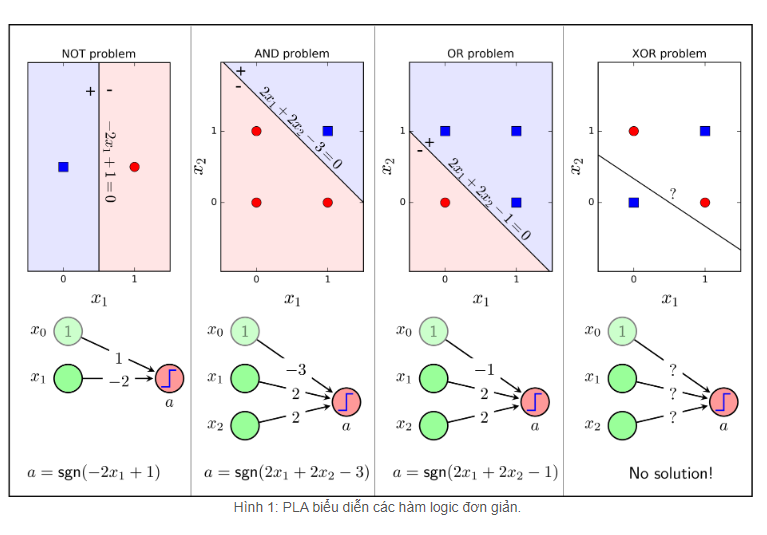


Ta thấy với các bài toán OR, AND và XOR dữ liệu là **linearly separable** vì thế ta có thể tìm được các hệ số cho perceptron giúp biểu diễn chính xác mỗi hàm số.

Với hàm XOR, khi $x_{1}=0$ thì ta có $a=sgn(-2*0+1)$. Khi $x_{1}=1$ thì $a=-1$, trong cả 2 trường hợp trên thì đầu ra dự đoán trùng khớp hết với đầu ra thực.

**2.Biểu diễn hàm XOR với Neural Network.**

Vì hàm XOR **không phải là linearly separable** nên ta không thể tìm 1 đường thẳng để phân chia 2 class xanh và đỏ nên bài toán vô nghiệm. Nếu ta thay PLA bằng Logistic Regression tức là thay hàm sgn sang sigmoid thì cũng vẫn vô nghiệm. (vì bản chất của Logistic cũng chỉ tạo ra được các đường biên có dạng tuyến tính). Chính vì thế, ta có thể nghĩ đến việc dùng 2 đường thẳng để phân chia.

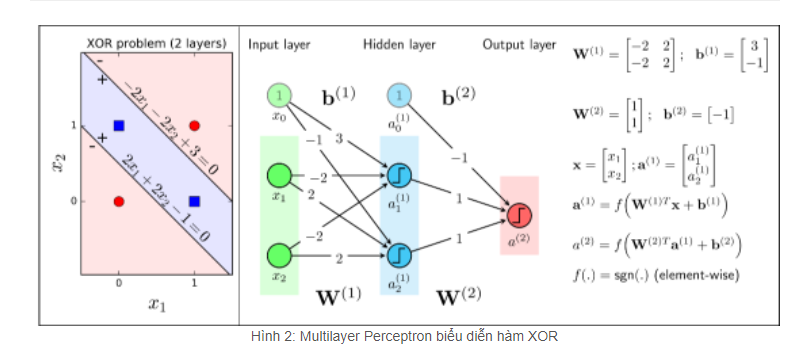

Các hệ số tương ứng với 2 đường thẳng được tính theo công thức như hình 2 bên phải. Đầu ra $a_{1}^{(1)}=1$ ứng với các điểm nằm về phía (+) của đường thẳng $-2x_{1}-2x_{2}+3=0$ và bằng -1 với các điểm nằm về phía (-) của đường thẳng này. Tương tự đầu ra $a_{2}^{(1)}=1$ với các điểm nằm về phía (+) của đường thẳng $2x_{1}+2x_{2}-1=0$. Như vậy 2 đường thẳng này tạo ra 2 đầu ra tại các node $a_{1}^{(1)}$, $a_{2}^{(1)}$. Vì hàm XOR chỉ có một đầu ra nên ta cần làm thêm 1 bước nữa là coi $a_{1} a_{2}$ như là input của 1 PLA khác. Trong PLA mới này, input là các node màu lam, node bias =1, output là các node đỏ. 

Thật vậy, việc dùng 2 đường phân chia này sẽ giúp ta biểu diễn được hàm XOR. Với các điểm dữ liệu hình vuông xanh, ta có $a_{1}^{(1)}=a_{2}^{(1)}=1$, khi đó $a^{(2)}=sgn(1+1-1)=1$ còn với các điểm dữ liệu tròn đỏ thì $a_{1}^{(1)}=-a_{2}^{(1)}$ nên khi đó $a^{(2)}=sgn(1-1-1)=-1$. Như vậy là trong cả 2 trường hợp thì đầu ra dự đoán đều trùng với đầu ra thực.

Nhìn vào mô hình trên, layer thứ nhất: input - lục, output - lam. Layer thứ hai: input - lam, output - đỏ. Ở đây, output của layer thứ nhất chính là input của layer thứ hai. Tổng hợp lại ta được một mô hình mà ngoài layer input (lục) và output (đỏ), ta còn có một layer nữa (lam). Mô hình này có tên gọi là Multi-layer Perceptron (MLP). Layer trung gian ở giữa còn được gọi là hidden layer.

#Lưu ý
1. Perceptron Learing Algorithm là một trường hợp của single-layer neural network với activation fucntion là hàm sgn. Trong khi đó, Perceptron là tên chung để chỉ các Neural Network với chỉ một input layer và một output tại output layer, không có hidden layer.

1. Các activation function có thể là các nonlinear function khác, ví dụ như sigmoid function hoặc tanh function. Các activation function phải là nonlinear (phi tuyến), vì nếu không, nhiều layer hay một layer cũng là như nhau. Ví dụ với hai layer trong Hình 2, nếu activation function là một hàm linear thì cả hai layer có thể được thay bằng một layer với ma trận hệ số $W=W^{(1)}W^{(2)}$.

1. Khác với các bài trước về Neural Networks, khi làm việc với MLP, ta nên tách riêng phần biases và ma trận hệ số ra. Điều này đồng nghĩa với việc vector input x là vector **KHÔNG** mở rộng.

**3.Các ký hiệu và khái niệm.**

3.1.Layers.

Ngoài Input layers và Output layers, một Multi-layer Perceptron (MLP) có thể có nhiều Hidden layers ở giữa. Các Hidden layers theo thứ tự từ input layer đến output layer được đánh số thứ thự là Hidden layer 1, Hidden layer 2, ...

Dưới đây là ví dụ với 2 Hidden layers:

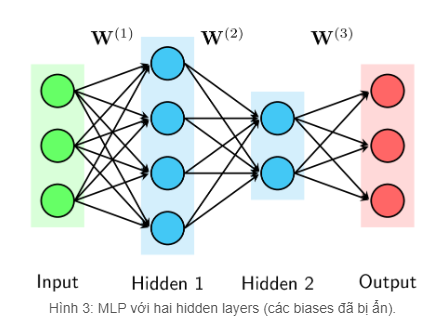

Số lượng layer trong một MLP được tính bằng số hidden layers cộng với 1. Tức là khi đếm số layers của một MLP, ta không tính input layers. Số lượng layer trong một MLP thường được ký hiệu là L. Trong Hình 3 trên đây, L=3.

3.2.Units.

Một node hình tròn trong một layer được gọi là một unit. Unit ở các input layer, hidden layers, và output layer được lần lượt gọi là input unit, hidden unit, và output unit. Đầu vào của các hidden layer được ký hiệu bởi 
z, đầu ra của mỗi unit thường được ký hiệu là a (thể hiện activation, tức giá trị của mỗi unit sau khi ta áp dụng activation function lên z). Đầu ra của unit thứ i trong layer thứ l được ký hiệu là $a_{i}^{(l)}$. Gỉả sử thêm rằng số unit trong layer thứ l là $d^{(l)}$. Vector biểu diễn output của layer thứ l ký hiệu là $a^{(l)}$.

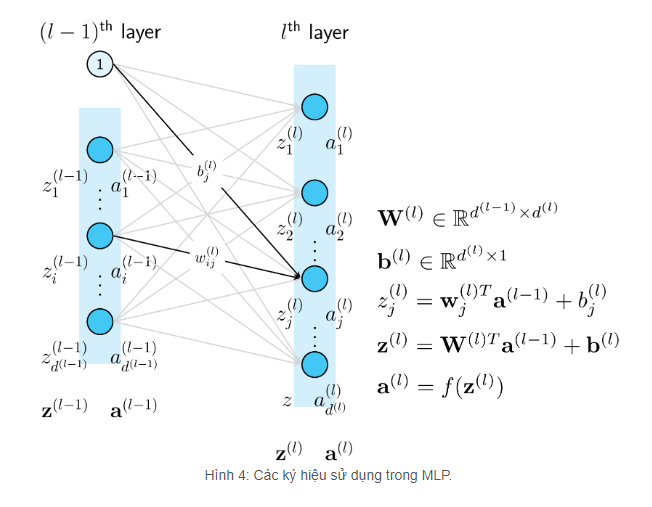

3.3. Weights và Biases.

Có L ma trận trọng số cho một MLP có L layers. Các ma trận này được ký hiệu là $W^{(l)}$ thể hiện các kết nối từ layer thứ l-1 đến layer thứ l. Phần tử $w_{ij}^{(l)}$ thể hiện kết nối từ node thứ i của layer thứ (l-1) tới node thứ j của layer thứ (l). Các biases của layer thứ (l) được ký hiệu là $b^{(l)}$. Khi tối ưu một MLP đồng nghĩa với việc ta cần đi tìm các weghts và biases này.

3.4. Activation functions

Mỗi output của một unit được tính theo công thức: $a_{i}^{(l)}=f(w_{i}^{(l)T}a^{(l-1)}+b_{i}^{(l)})$

Trong đó f() là 1 nonlinear activation function. Ở dạng vector, biểu thức trên được viết thành: $a^{(l)}=f(W^{(l)T}a^{(l-1)}+b^{(l)})$

Khi hàm f() được áp dụng cho một ma trận (hoặc vector), ta hiểu rằng nó được áp dụng cho từng thành phần của ma trận đó. Sau đó các thành phần này được sắp xếp lại đúng theo thứ tự để được một ma trận có kích thước bằng với ma trận input. Trong tiếng Anh, việc áp dụng lên từng phần tử như thế này được gọi là element-wise.

Hàm sgn (còn gọi là hard-threshold) chỉ được sử dụng trong PLA, mang mục đích lý thuyết là chính. Trong thực tế, hàm sgn không được sử dụng vì hai lý do: đầu ra là discrete, và đạo hàm tại hầu hết các điểm bằng 0 (trừ điểm 0 không có đạo hàm). Việc đạo hàm bằng 0 này khiến cho các thuật toán gradient-based (ví dụ như Gradient Descent) không hoạt động!

3.5. Sigmoid và Tanh.

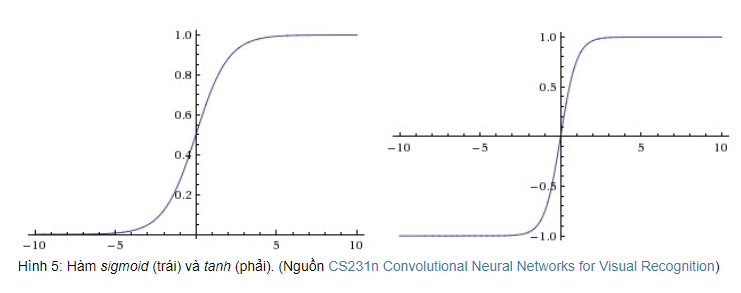

Hàm sigmoid có dạng $f(s)=1/(1+e^{-s})$ có giới hạn từ (0,1). Hàm này bây giờ rất ít dùng vì nó có nhược điểm sau: Sigmoid saturate and kill gradients: Một nhược điểm dễ nhận thấy là khi đầu vào có trị tuyệt đối lớn (rất âm hoặc rất dương), gradient của hàm số này sẽ rất gần với 0. Điều này đồng nghĩa với việc các hệ số tương ứng với unit đang xét sẽ gần như không được cập nhật.

Hàm tanh có dạng $f(s)=(e^{s}-e^{-s})/(e^{s}+e^{-s})$ có giới hạn từ (-1,1). Hàm tanh cũng có nhược điểm tương tự như hàm sigmoid khi các đầu vào có giá trị tuyệt đối lớn thì gradient rất nhỏ. 

3.6. ReLU.

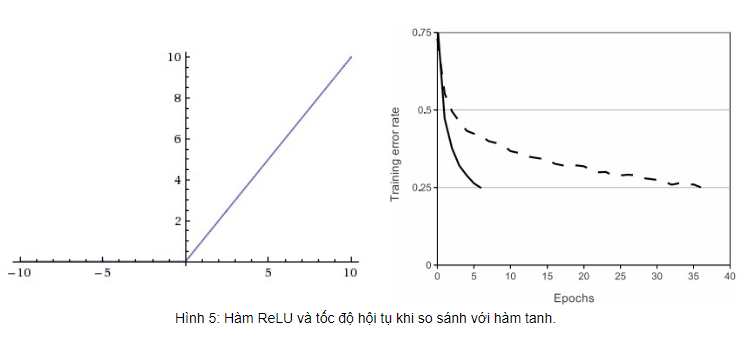

Hàm ReLU (Rectified Linear Unit) được dùng rộng rãi vì tính đơn giản của nó. Công thức của ReLU là $f(s) = max(0,s)$.

#Ưu điểm:
1. ReLU được chứng minh giúp cho việc training các Deep Networks nhanh hơn rất nhiều. Hình trên so sánh sự hội tụ của SGD khi sử dụng hai activation function khác nhau: ReLU và tanh. Sự tăng tốc này được cho là vì ReLU được tính toán gần như tức thời và gradient của nó cũng được tính cực nhanh với gradient bằng 1 nếu đầu vào lớn hơn 0, bằng 0 nếu đầu vào nhỏ hơn 0.
1. Mặc dù hàm ReLU không có đạo hàm tại s=0, trong thực nghiệm, người ta vẫn thường định nghĩa ReLU′(0)=0 và khẳng định thêm rằng, xác suất để input của một unit bằng 0 là rất nhỏ.

#3.7.Lưu ý.

1. Output layer nhiều khi không có activation function mà sử dụng trực tiếp giá trị đầu vào $z_{i}^{(l)}$ của mỗi unit. Hoặc nói một cách khác, activation function chính là hàm identity, tức đầu ra bằng đầu vào. Với các bài toán classification, output layer thường là một Softmax Regression layer giúp tính xác suất để một điểm dữ liệu rơi vào mỗi class.

1. Mặc dù activation function cho mỗi unit có thể khác nhau, trong cùng một network, activation như nhau thường được sử dụng. Điều này giúp cho việc tính toán được đơn giản hơn.

**4.Backpropagation**

Phương pháp phổ biến nhất để tối ưu MLP vẫn là Gradient Descent (GD). Để áp dụng GD, chúng ta cần tính được gradient của hàm mất mát theo từng ma trận trọng số $W^{(l)}$ và vector bias $b^{(l)}$. Trước hết ta cần tính predicted output $y^{-}$ với một input $x$

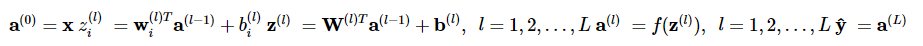

Bước này được gói là feedforward vì cách tính toán được thực hiện từ đầu đến cuối của network. MLP cũng được gọi.

Giả sử $J(W,b,X,Y)$ là một hàm mất mát của bài toán, trong đó $W,b$ là tập hợp tất cả các ma trận trọng số giữa các layers và biases của mỗi layer. $X,Y$ là cặp dữ liệu huấn luyện với mỗi cột tương ứng với một điểm dữ liệu. Để có thể áp dụng các gradient-based methods (mà Gradient Descent là một ví dụ), chúng ta cần tính được: 

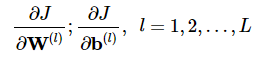  

Một ví dụ của hàm mất mát là hàm Mean Square Error (MSE) tức trung bình của bình phương lỗi: 

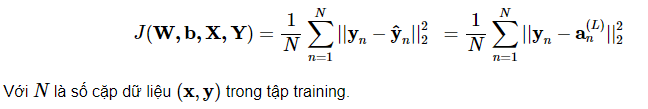

Theo những công thức ở trên, việc tính toán trực tiếp giá trị này là cực kỳ phức tạp vì hàm mất mát không phụ thuộc trực tiếp vào các hệ số. Phương pháp phổ biến nhất được dùng có tên là Backpropagation giúp tính gradient ngược từ layer cuối cùng đến layer đầu tiên. Layer cuối cùng được tính toán trước vì nó gần gũi hơn với predicted outputs và hàm mất mát. Việc tính toán gradient của các layer trước được thực hiện dựa trên một quy tắc quen thuộc có tên là chain rule, tức đạo hàm của hàm hợp.

Stochastic Gradient Descent có thể được sử dụng để tính gradient cho các ma trận trọng số và biases dựa trên một cặp điểm training 
$x,y$. Để cho đơn giản, ta coi $J$ là hàm mất mát nếu chỉ xét cặp điểm này, ở đây $J$ là hàm mất mát bất kỳ, không chỉ hàm $MSE$ như ở trên.

Đạo hàm của hàm mất mát theo chỉ một thành phần của ma trận trọng số của lớp cuối cùng:

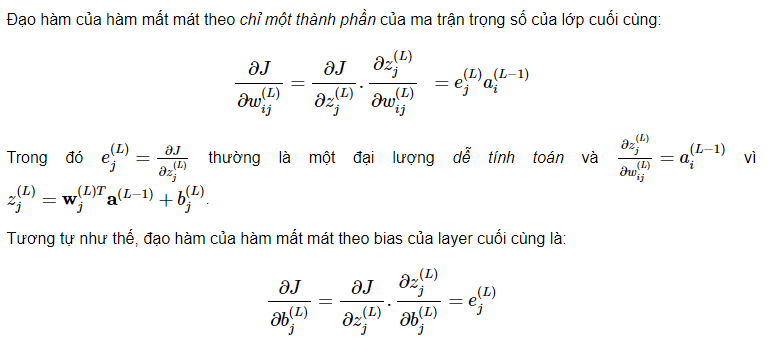

Với đạo hàm theo hệ số ở các lớp l thấp hơn, chúng ta hay xem hình dưới đây:

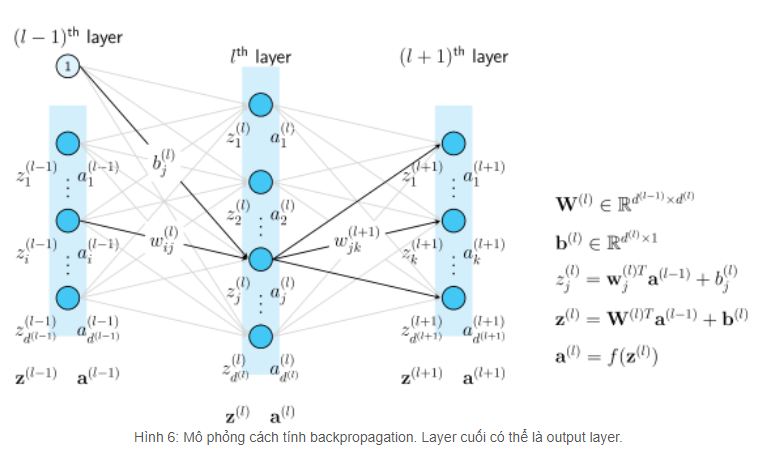

Dựa vào hình trên ta có thể tính được:

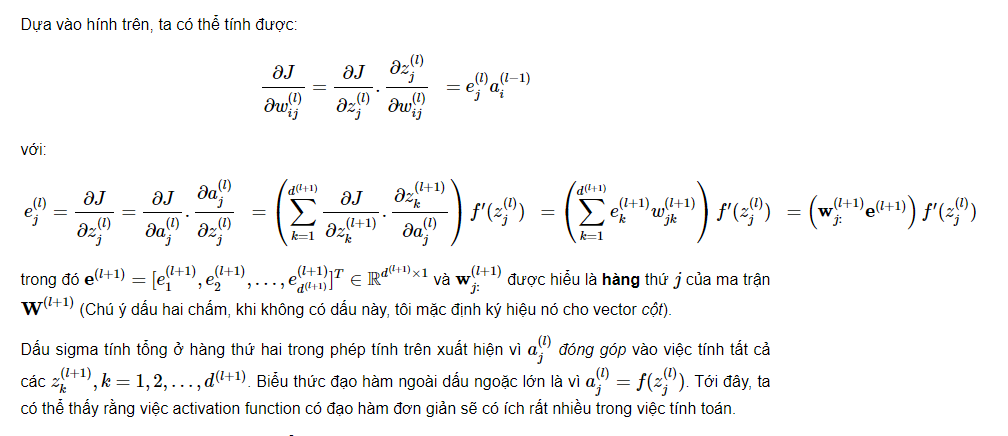

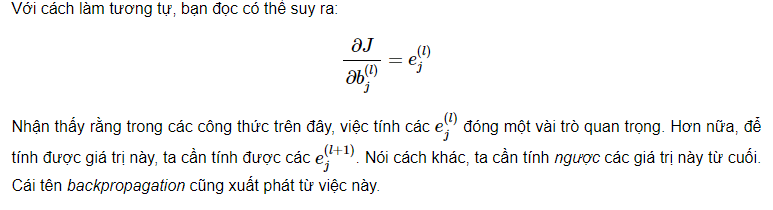

4.1. Backpropagation cho Stochastic Gradient Descent

4.1.1. Đạo hàm theo từng hệ số $w_{ij}^{(l)},b_{i}^{(l)}$ 

1.Bước feedforward: với 1 giá trị đầu vào $x$ ta sẽ tính giá trị đầu ra của network, trong quá trình tính toán, lưu lại các activation $a^{(l)}$ tại mỗi layer.

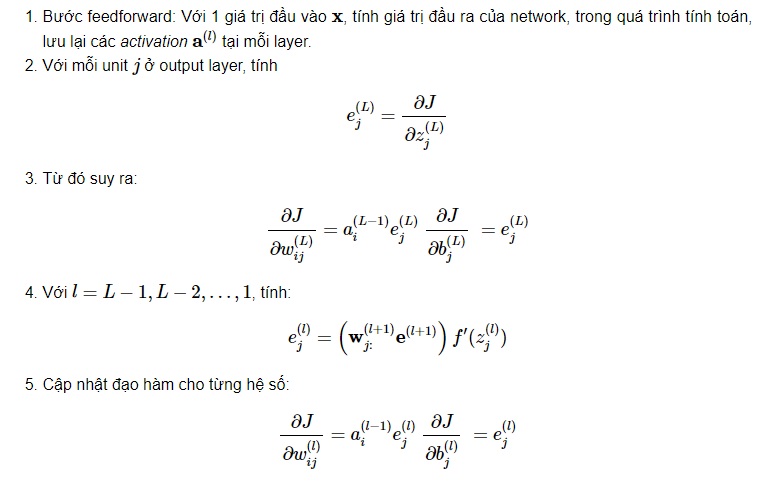

4.1.2. Đạo hàm theo ma trận $W^{(l)}, b^{(l)}$.

Việc tính toán theo hệ số như trên chỉ phù hợp với hiểu nguyên lý tính toán còn lúc code ta cần tìm cách thu gọn chúng về dạng vector và ma trận để tăng tốc độ cho thuật toán. Đặt $e^{(l)}=[e_{1}^{(l)},e_{2}^{(l)},...,e_{d^{(l)}}^{(l)}]^{T}$. Ta có quy tắc sau:

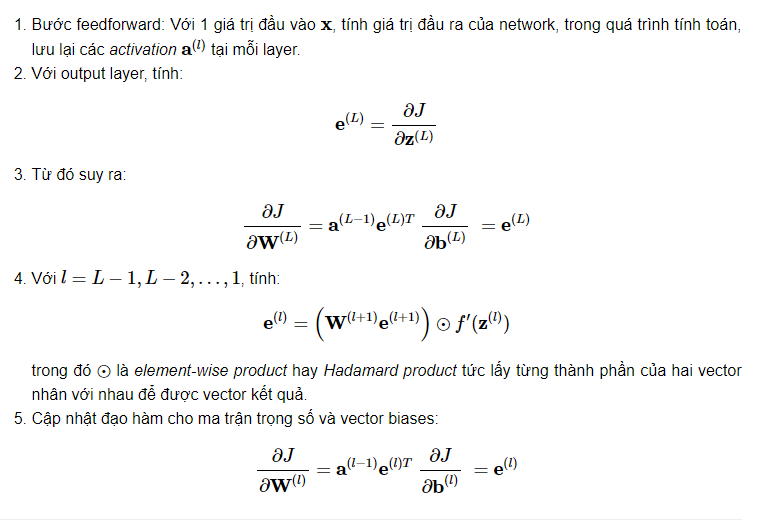

4.2. Backpropagation cho Batch (mini-batch) Gradient Descent

Thực tế thì mini-batch được dùng nhiều nhất. Nếu lượng dữ liệu là nhỏ, Batch GD trực tiếp được sử dụng.

Khi đó, cặp (input,output) sẽ ở dạng ma trận $(X,Y)$. Giả sử mỗi lần tính toán, ta lấy N dữ liệu để tính toán.

Khi đó các activation sau mỗi layer sẽ có dạng $A^{(l)}$, tương tự thế ta có $E^{(l)}$. Ta có các công thức sau:

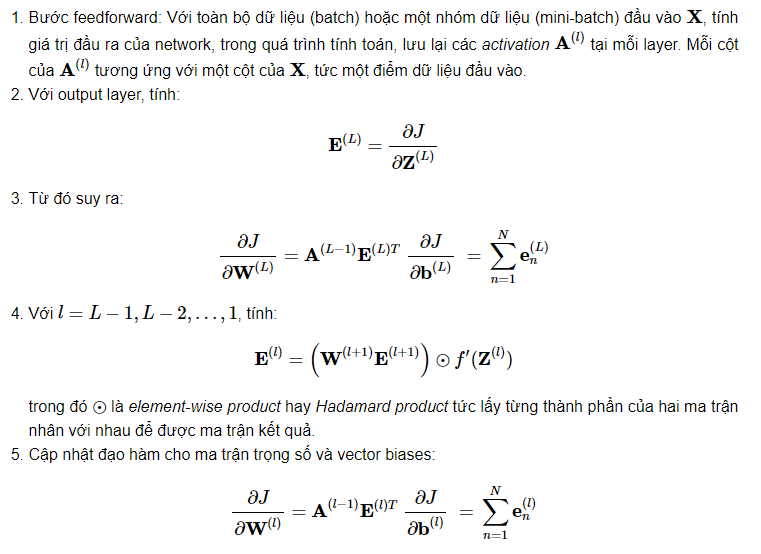

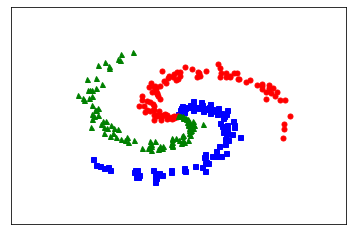

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 5)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 5)
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 5)
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

Với dữ liệu được phân bố thế này, Softmax Regression không thể thực hiện được vì Bounray giữa các class tạo bởi Softmax Regression có dạng linear. Chúng ta hãy làm một thí nghiệm nhỏ bằng cách thêm một Hidden layer vào giữa Input layer vả output layer của Softmax Regression. Activation function của Hidden layer là hàm ReLU.

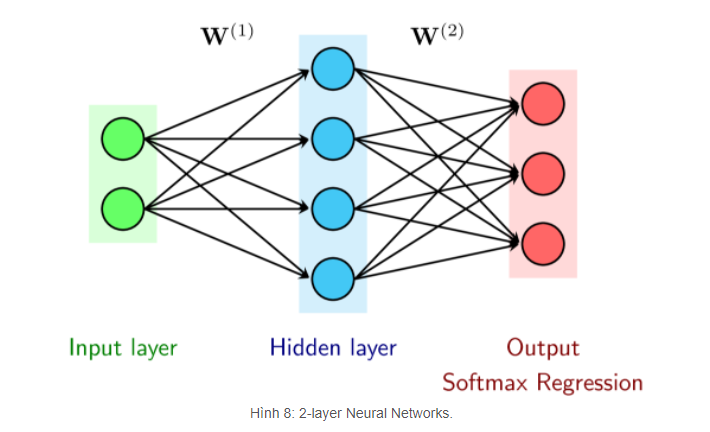

Bây giờ chúng ta sẽ áp dụng Batch Gradient Descent cho bài toán này (vì lượng dữ liệu là nhỏ). Trước hết cần thực tìm công thức tính các activation và output.

**TÍNH TOÁN FEEDFORWARD**

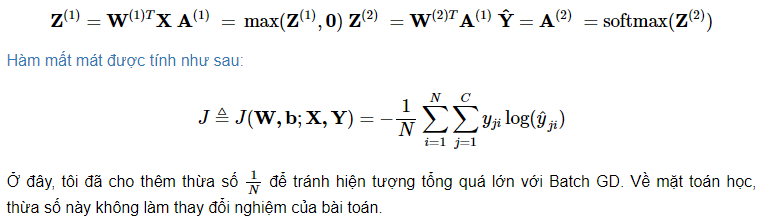

**Tính toán Backpropagation**

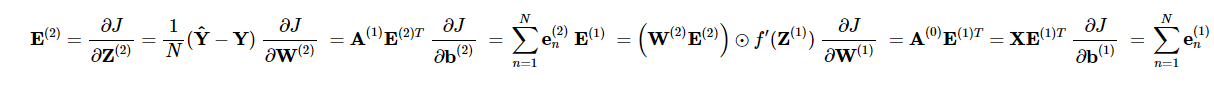

In [7]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [9]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)

    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))

    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)

    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

iter 0, loss: 1.098642
iter 1000, loss: 0.116266
iter 2000, loss: 0.055726
iter 3000, loss: 0.038833
iter 4000, loss: 0.031605
iter 5000, loss: 0.027496
iter 6000, loss: 0.024754
iter 7000, loss: 0.022814
iter 8000, loss: 0.021375
iter 9000, loss: 0.020268


In [10]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))

training accuracy: 99.33 %


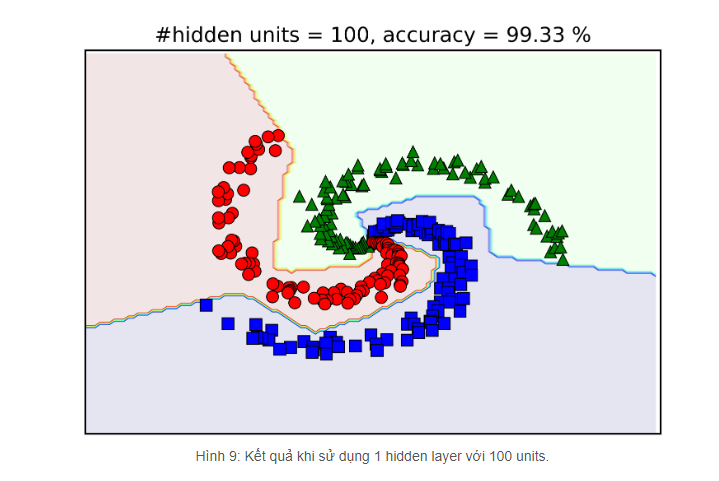

Như vậy là chỉ có 1 vài điểm rất ít bị phân loại sai, có thể là do chúng nằm gần trung tâm.

Vậy là chỉ thêm 1 hidden layer, Neural Network đã có thể xây dựng được boundary phi tuyến. Kết luận đầu tiên ở đây là khả năng biểu diễn của MLP tốt hơn rất nhiều so với 1-layer Neural Network.

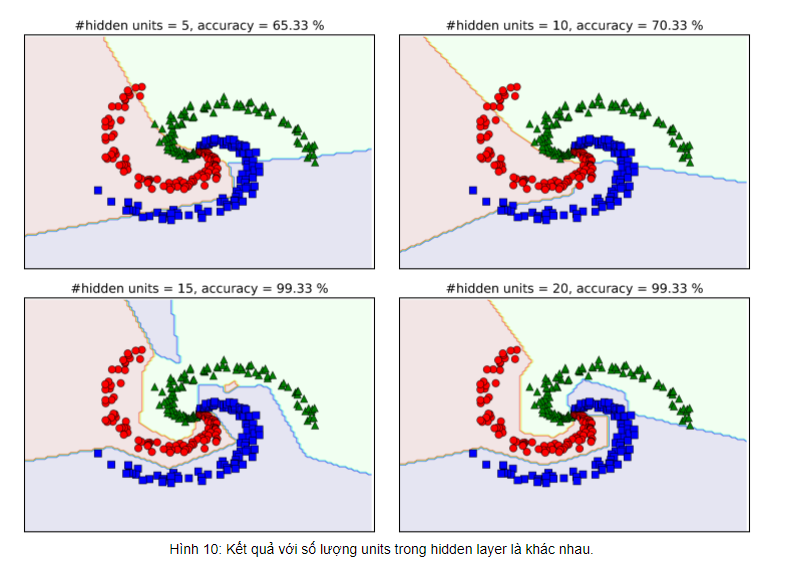

#Nhận xét:

1. Khi số lượng hidden units tăng lên, độ chính xác của mô hình tạo được cũng tăng lên.
1. Với d1=5 đường phân định giữa ba classes gần như là đường thẳng.
1. với d1=15 mặc dù kết quả đã đạt 99.33%, vẫn có một vùng đỏ nhỏ nằm giữa nhánh màu lục và màu lam, và một vùng màu lam khá lớn giữa màu đỏ và lục. Khi một điểm dữ liệu test rơi vào những vùng này, nó sẽ bị phân loại sai.
1. Với d1=20 kết quả nhận được đã tương đối giống với d1 = 100. Mặc dù các đường boundary không được trơn tru cho lắm.


#Thảo luận:

1. Với 1 hàm số liên tục bất kỳ f(x) và 1 số dương e thì luôn tồn tại một Neural Network với predicted output có dạng g(x) với một hidden layer (với số hidden units đủ lớn và nonlinear activation function phù hợp) sao cho với mọi 
x thì |f(x) - g(x)| < e. Nói một cách khác, Neural Network có khả năng xấp xỉ hầu hết các hàm liên tục.
1. Trên thực tế, việc tìm ra số lượng hidden units và nonlinear activation function nói trên nhiều khi bất khả thi. Thay vào đó, thực nghiệm chứng minh rằng Neural Networks với nhiều hidden layers kết hợp với các nonlinear activation function (đơn giản như ReLU) có khả năng xấp xỉ (khả năng biểu diễn) training data tốt hơn.
1. Khi số lượng hidden layers lớn lên, số lượng hệ số cần tối ưu cũng lớn lên và mô hình sẽ trở nên phức tạp. Sự phức tạp này ảnh hưởng tới hai khia cạnh. Thứ nhất, tốc độ tính toán sẽ bị chậm đi rất nhiều. Thứ hai, nếu mô hình quá phức tạp, nó có thể biểu diễn rất tốt training data, nhưng lại không biểu diễn tốt test data. Như vậy là sẽ bị Overfitting.
1. Nếu mọi units của một layer được kết nối với mọi unit của layer tiếp theo (như chúng ta đang xét trong baì này), ta gọi đó là fully connected layer (kết nối hoàn toàn). Neural Networks với toàn fully connected layer ít được sử dụng trong thực tế. Thay vào đó, có nhiều phương pháp giúp làm giảm độ phức tạp của mô hình bằng cách giảm số lượng kết nối bằng cách cho nhiều kết nối bằng 0 (ví dụ, sparse autoencoder), hoặc các hệ số được ràng buộc giống nhau (để giảm số hệ số cần tối ưu) (ví dụ, Convolutional Neural Networks (CNNs / ConvNets)).

